In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sekolahdatambc2021/titanic_data.csv
/kaggle/input/sekolahdatambc2021/data_mix.csv
/kaggle/input/sekolahdatambc2021/SampleSubmission.csv
/kaggle/input/sekolahdatambc2021/train.csv
/kaggle/input/sekolahdatambc2021/test.csv


## Milestone 1 : Basic Data Science

Tugas dapat dikerjakan dengan menggunakan dataset yang diberikan. Gunakan pd.read_csv() untuk membaca data lalu cari solusi dari pertanyaan yang diberikan. Idealnya, tugas baru bisa dikerjakan setelah day 2 tanggal 17 juli. Namun, anda dapat mencuri start jika merasa bisa mengerjakan tugas ini.

Pre-requisites : Materi day 1 dan 2.

## Untuk soal di bawah ini, gunakan data train.

path : '/kaggle/input/sekolahdatambc2021/train.csv'

Carilah:
- Usia tertua responden.
- Usia termuda responden.
- Rata-rata usia responden.
- Nilai tengah usia responden.
- Modus usia responden. Jika terdapat dua atau lebih nilai modus, ambil angka pertama.

Gunakan dataset untuk mencari nilai-nilai tersebut.

Hint : Gunakan .mean(), .mode()[0] (elemen pertama dari modus), .median(), .max(), dan .min().

In [2]:
train = pd.read_csv("/kaggle/input/sekolahdatambc2021/train.csv")

#Usia Tertua Responden
train.usia.max()

90

In [3]:
#Usia Termuda Responden
train.usia.min()

17

In [4]:
#Rata-rata Usia Responden
train.usia.mean()

38.29106495219255

In [5]:
#Nilai Tengah Usia Responden
train.usia.median()

37.0

In [6]:
#Modus Usia Responden 
train.usia.mode()[0]

36

2. Lakukanlah visualisasi dari data:

Jumlah responden berdomisili jakarta berdasarkan pendidikan terakhir (gunakan bar plot).

Perbandingan responden berpenghasilan tinggi dan rendah dari masing-masing profesi (gunakan kolom "kategori" dan "pekerjaan". Gunakan bar plot.

Perbandingan responden berpenghasilan tinggi dan rendah dari setiap kelompok umur per 10 tahun (gunakan kolom "kategori" dan "pekerjaan". Gunakan bar plot.

Distribusi lama pendidikan responden dari setiap pendidikan terakhir yang dilalui (gunakan boxplot untuk mempermudah terlihatnya outliers).

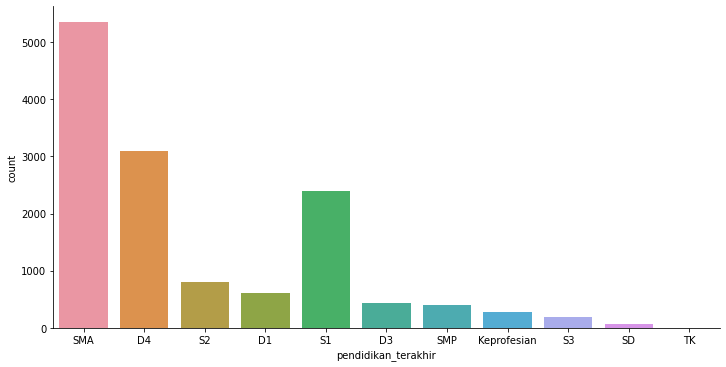

In [7]:
#Jumlah responden berdomisili jakarta berdasarkan pendidikan terakhir
datBase = pd.read_csv("/kaggle/input/sekolahdatambc2021/train.csv")
datBase.sort_values("usia")
sns.catplot(data= datBase.loc[datBase.asal_daerah == "jakarta"], x="pendidikan_terakhir", kind="count", aspect=2)

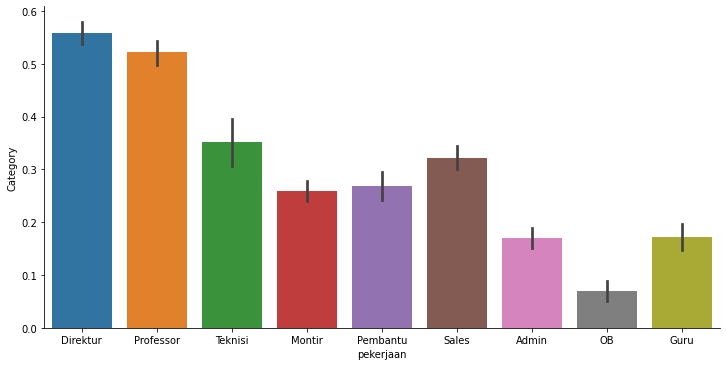

In [8]:
#Perbandingan responden berpenghasilan tinggi dan rendah dari masing-masing profesi
sns.catplot(data=datBase, x="pekerjaan", y="Category", kind="bar", aspect=2)

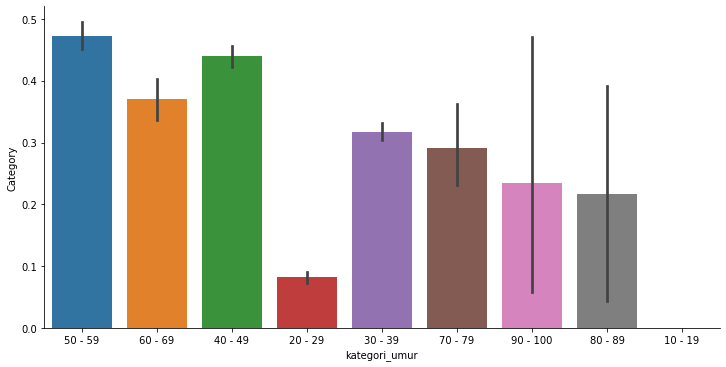

In [9]:
#Perbandingan responden berpenghasilan tinggi dan rendah dari setiap kelompok umur per 10 tahun
temp = [0 for i in range(datBase.shape[0])]

for i in range(datBase.shape[0]):
    if (datBase.usia[i] >= 90):
        temp[i] = "90 - 100"
    elif (datBase.usia[i] >= 80):
        temp[i] = "80 - 89"
    elif (datBase.usia[i] >= 70):
        temp[i] = "70 - 79"
    elif (datBase.usia[i] >= 60):
        temp[i] = "60 - 69"
    elif (datBase.usia[i] >= 50):
        temp[i] = "50 - 59"
    elif (datBase.usia[i] >= 40):
        temp[i] = "40 - 49"
    elif (datBase.usia[i] >= 30):
        temp[i] = "30 - 39"
    elif (datBase.usia[i] >= 20):
        temp[i] = "20 - 29"
    elif (datBase.usia[i] >= 10):
        temp[i] = "10 - 19"
    else:
        temp[i] = "0 - 10"
        
datBase.insert( (datBase.shape[1]), "kategori_umur",temp)

sns.catplot(data=datBase, x="kategori_umur", y="Category", kind="bar", aspect=2)

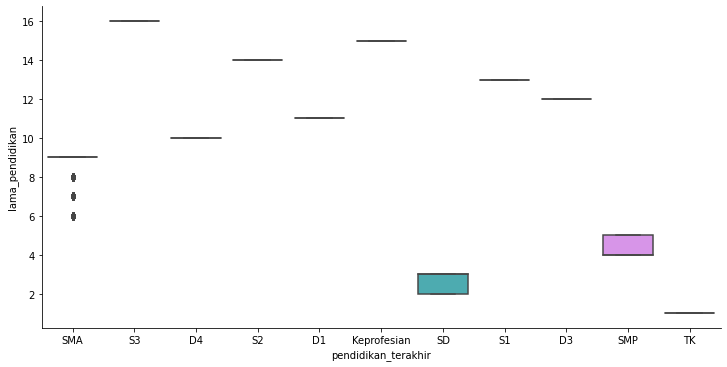

In [10]:
#Distribusi lama pendidikan responden dari setiap pendidikan terakhir yang dilalui
sns.catplot(data=datBase, x="pendidikan_terakhir", y="lama_pendidikan", kind="box", aspect=2)

Apa yang bisa kamu simpulkan dari visualisasi berbagai chart pada bagian sebelumnya? Jelaskan juga apabila terdapat outliers dari visualisasi tersebut.

hint : jawab dengan menambahkan markdown

**Grafik 1**

Dapat dilihat bahwa mayoritas responden dari Jakarta mayoritas mempunyai pendidikan terakhir pada SMA yang diikuti oleh D4 dan kemudian S1.

**Grafik 2**

Terlihat bahwa responden yang berpenghasilan tinggi paling banyak bekerja sebagai direktur, kemudian professor, dan diikuti teknisi.

**Grafik 3**

Terlihat bahwa usia pada rentang 50-59 mempunyai penghasillan paling tinggi. Selain itu, penyebaran penghasilan ini semakin variatif dengan bertambahnya usia (dilihat dari membesarnya error pada graph).

**Grafik 4**

Dilihat bahwa beberapa responden ada yang lulus/keluar dari SMA, SMP, dan SD terlebih dahulu sebelum selesai menjalankannya

**Tambahan**
Sebagian besar sampel memiliki SMA sebagai pendidikan terakhir,yang paling sedikit adalah TK sebagai pendidikan terakhir (bahkan hampir tidak terlihat dalam bar). Sebagian besar sampel memiliki pekerjaan sebagai direktur dan professor, dan sebagian kecilnya merupakan OB. Sampel diambil paling banyak dari kalangan usia 50-59 tahun, dan paling sedikit kategori 20-29 atau mungkin 90-100 (error marginnya lumayan besar). Wanita cenderung menghabiskan waktu kerjanya sebanyak 5 sampai dengan 65 jam per minggu, dan pria cenderung menghabiskan waktu kerjanya sebanyak 0 sampai dengan 90 jam per minggu. Jam kerja wanita sangat variatif pada lama pendidikan 9 sampai dengan 13 tahun, sementara pria pada lama pendidikan 9 sampai dengan 15. Dilihat dari pendidikan terakhir, TK dapat dikategorikan sebagai pencilan karena sangat kecil, namun setelah ditilik, sampel dengan pendidikan terakhir TK memiliki jam kerja mayoritas 40 jam per minggu, dan persebaran usia terbanyaknya ada di sekitar usia 30 tahun. Secara rata-rata, OB memiliki rerata lama pendidikan yang paling rendah, yakni 8.5 tahun, sedangkan professor memiliki rerata lama pendidikan yang paling tinggi, yakni 13 tahun. Pekerjaan OB lebih banyak digeluti Pria dibanding Wanita. Sampel berstatus single parent memiliki persebaran rerata pendidikan 6 sampai dengan 13 tahun, dengan jam kerja per minggu mayoritas 4 sampai dengan 40 jam per minggunya. Adapun data pencilan yang dapat dilihat pada setiap scatter plot seperti jam kerja mendekati hingga 100 jam per minggu.

Lakukanlah data preparation pada dataset yang diberikan sedemikian sehingga dapat dilakukan feature engineering serta pemodelan machine learning (Tugas feature engineering diberikan pada day berikutnya).

note : untuk mempermudah pemodelan machine learning, jika anda melakukan pembersihan data train, anda juga perlu melakuakn pembersihan data test.

Path :
- /kaggle/input/sekolahdatambc2021/train.csv
- /kaggle/input/sekolahdatambc2021/test.csv

In [11]:
test = pd.read_csv("/kaggle/input/sekolahdatambc2021/test.csv")
train = pd.read_csv("/kaggle/input/sekolahdatambc2021/train.csv")

In [12]:
train

Id  usia       tipe_pekerjaan pendidikan_terakhir  lama_pendidikan  \
0          0    52    Pengusaha mandiri                 SMA                9   
1          1    64  Pemerintah provinsi                  S3               16   
2          2    53  Pemerintah nasional                 SMA                9   
3          3    47              Startup                 SMA                9   
4          4    29      Pekerja mandiri                  D4               10   
...      ...   ...                  ...                 ...              ...   
15160  15160    29              Startup                  S2               14   
15161  15161    18              Startup                 SMA                6   
15162  15162    40              Startup                 SMP                4   
15163  15163    59      Pekerja mandiri                 SMP                4   
15164  15164    38  Pemerintah provinsi                 SMA                9   

      status_perkawinan  pekerjaan status_dalam_keluarga jenis_kelamin  \
0        Pasangan Sipil   Direktur                 Istri        Wanita   
1        Pasangan Sipil  Professor                 Suami          Pria   
2        Pasangan Sipil    Teknisi                 Suami          Pria   
3        Pasangan Sipil     Montir                 Suami          Pria   
4        Pasangan Sipil     Montir                 Suami          Pria   
...                 ...        ...                   ...           ...   
15160     Belum menikah  Professor           Yatim Piatu        Wanita   
15161     Belum menikah      Sales                   NaN        Wanita   
15162     Belum menikah        NaN         Single Parent          Pria   
15163    Pasangan Sipil      Sales                 Suami          Pria   
15164             Cerai        NaN                Lajang        Wanita   

       invest_untung  invest_rugi  jam_kerja_per_minggu     asal_daerah  \
0            15024.0          NaN                    40         jakarta   
1                NaN          NaN                    50  sumatera utara   
2                NaN          NaN                    40            riau   
3             5178.0          NaN                    40         jakarta   
4                NaN       1485.0                    60         jakarta   
...              ...          ...                   ...             ...   
15160            NaN          NaN                    80         jakarta   
15161            NaN          NaN                    40         jakarta   
15162            NaN          NaN                    40         jakarta   
15163            NaN          NaN                    85         jakarta   
15164         2036.0          NaN                    20         jakarta   

       Category  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
15160         0  
15161         0  
15162         0  
15163         0  
15164         0  

[15165 rows x 14 columns]

In [13]:
ProfileReport(train)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
#Mencari persentase data kosong pada setiap kolom
(train.isnull().sum() / train.shape[0]) * 100

Id                        0.000000
usia                      0.000000
tipe_pekerjaan            5.110452
pendidikan_terakhir       0.000000
lama_pendidikan           0.000000
status_perkawinan         0.000000
pekerjaan                17.243653
status_dalam_keluarga     2.611276
jenis_kelamin             0.000000
invest_untung            84.668645
invest_rugi              91.579294
jam_kerja_per_minggu      0.000000
asal_daerah               0.000000
Category                  0.000000
dtype: float64

In [15]:
#Dengan pertimbangan rule of thumb 20%, kolom invest_rugi dan invest_untung akan dihapus.
train = train.drop(["invest_rugi","invest_untung"], axis = 1)

In [16]:
train

Id  usia       tipe_pekerjaan pendidikan_terakhir  lama_pendidikan  \
0          0    52    Pengusaha mandiri                 SMA                9   
1          1    64  Pemerintah provinsi                  S3               16   
2          2    53  Pemerintah nasional                 SMA                9   
3          3    47              Startup                 SMA                9   
4          4    29      Pekerja mandiri                  D4               10   
...      ...   ...                  ...                 ...              ...   
15160  15160    29              Startup                  S2               14   
15161  15161    18              Startup                 SMA                6   
15162  15162    40              Startup                 SMP                4   
15163  15163    59      Pekerja mandiri                 SMP                4   
15164  15164    38  Pemerintah provinsi                 SMA                9   

      status_perkawinan  pekerjaan status_dalam_keluarga jenis_kelamin  \
0        Pasangan Sipil   Direktur                 Istri        Wanita   
1        Pasangan Sipil  Professor                 Suami          Pria   
2        Pasangan Sipil    Teknisi                 Suami          Pria   
3        Pasangan Sipil     Montir                 Suami          Pria   
4        Pasangan Sipil     Montir                 Suami          Pria   
...                 ...        ...                   ...           ...   
15160     Belum menikah  Professor           Yatim Piatu        Wanita   
15161     Belum menikah      Sales                   NaN        Wanita   
15162     Belum menikah        NaN         Single Parent          Pria   
15163    Pasangan Sipil      Sales                 Suami          Pria   
15164             Cerai        NaN                Lajang        Wanita   

       jam_kerja_per_minggu     asal_daerah  Category  
0                        40         jakarta         1  
1                        50  sumatera utara         1  
2                        40            riau         1  
3                        40         jakarta         1  
4                        60         jakarta         1  
...                     ...             ...       ...  
15160                    80         jakarta         0  
15161                    40         jakarta         0  
15162                    40         jakarta         0  
15163                    85         jakarta         0  
15164                    20         jakarta         0  

[15165 rows x 12 columns]

In [17]:
train.pekerjaan.value_counts()

Professor    2075
Direktur     2027
Montir       1971
Sales        1788
Admin        1651
Pembantu     1053
Guru          888
OB            654
Teknisi       443
Name: pekerjaan, dtype: int64

In [18]:
train[["pekerjaan","pendidikan_terakhir"]].groupby(["pendidikan_terakhir"]).pekerjaan.describe()

count unique        top  freq
pendidikan_terakhir                              
D1                    559      9     Montir   125
D3                    428      9      Admin    90
D4                   2695      9      Admin   558
Keprofesian           319      7  Professor   261
S1                   2493      9  Professor   731
S2                    859      9  Professor   437
S3                    230      6  Professor   182
SD                    132      8     Montir    32
SMA                  4490      9     Montir  1101
SMP                   338      9     Montir   111
TK                      7      2       Guru     4

In [19]:
#imputasi kolom pekerjaan dengan mengisi NaN menggunakan modus antara pekerjaan dan pendidikan_akhir
for i in range(train.shape[0]):
    if pd.isnull(train["pekerjaan"][i]):
        if train.pendidikan_terakhir[i] == ("D1" or "SD" or "SMA" or "SMP"):
            train["pekerjaan"][i] = "Montir"
        elif train.pendidikan_terakhir[i] == ("D3" or "D4"):
            train["pekerjaan"][i] = "Admin"
        elif train.pendidikan_terakhir[i] == ("Keprofesian" or "S1" or "S2" or "S3"):
            train["pekerjaan"][i] = "Professor"
        else:
            train["pekerjaan"][i] = "Guru"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-package

In [20]:
train

Id  usia       tipe_pekerjaan pendidikan_terakhir  lama_pendidikan  \
0          0    52    Pengusaha mandiri                 SMA                9   
1          1    64  Pemerintah provinsi                  S3               16   
2          2    53  Pemerintah nasional                 SMA                9   
3          3    47              Startup                 SMA                9   
4          4    29      Pekerja mandiri                  D4               10   
...      ...   ...                  ...                 ...              ...   
15160  15160    29              Startup                  S2               14   
15161  15161    18              Startup                 SMA                6   
15162  15162    40              Startup                 SMP                4   
15163  15163    59      Pekerja mandiri                 SMP                4   
15164  15164    38  Pemerintah provinsi                 SMA                9   

      status_perkawinan  pekerjaan status_dalam_keluarga jenis_kelamin  \
0        Pasangan Sipil   Direktur                 Istri        Wanita   
1        Pasangan Sipil  Professor                 Suami          Pria   
2        Pasangan Sipil    Teknisi                 Suami          Pria   
3        Pasangan Sipil     Montir                 Suami          Pria   
4        Pasangan Sipil     Montir                 Suami          Pria   
...                 ...        ...                   ...           ...   
15160     Belum menikah  Professor           Yatim Piatu        Wanita   
15161     Belum menikah      Sales                   NaN        Wanita   
15162     Belum menikah       Guru         Single Parent          Pria   
15163    Pasangan Sipil      Sales                 Suami          Pria   
15164             Cerai       Guru                Lajang        Wanita   

       jam_kerja_per_minggu     asal_daerah  Category  
0                        40         jakarta         1  
1                        50  sumatera utara         1  
2                        40            riau         1  
3                        40         jakarta         1  
4                        60         jakarta         1  
...                     ...             ...       ...  
15160                    80         jakarta         0  
15161                    40         jakarta         0  
15162                    40         jakarta         0  
15163                    85         jakarta         0  
15164                    20         jakarta         0  

[15165 rows x 12 columns]

In [21]:
#Kolom pekerjaan sudah clean !
(train.isnull().sum() / train.shape[0]) * 100

Id                       0.000000
usia                     0.000000
tipe_pekerjaan           5.110452
pendidikan_terakhir      0.000000
lama_pendidikan          0.000000
status_perkawinan        0.000000
pekerjaan                0.000000
status_dalam_keluarga    2.611276
jenis_kelamin            0.000000
jam_kerja_per_minggu     0.000000
asal_daerah              0.000000
Category                 0.000000
dtype: float64

In [22]:
#imputasi kolom tipe_pekerjaan
#korelasi tipe_pekerjaan dan pekerjaan cukup tinggi
train[["pekerjaan","tipe_pekerjaan"]].groupby(["pekerjaan"]).tipe_pekerjaan.describe()

count unique      top  freq
pekerjaan                            
Admin      1691      7  Startup  1259
Direktur   2027      6  Startup  1335
Guru       2607      8  Startup  2108
Montir     2049      7  Startup  1579
OB          654      7  Startup   608
Pembantu   1053      7  Startup   662
Professor  2078      6  Startup  1141
Sales      1788      6  Startup  1416
Teknisi     443      6  Startup   363

In [23]:
#Dari tabel frekuensi diatas, masing-masing pekerjaan memiliki tipe_pekerjaan di startup

for i in range(train.shape[0]):
    if pd.isnull(train["tipe_pekerjaan"][i]):
        train["tipe_pekerjaan"][i] = "Startup"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
train

Id  usia       tipe_pekerjaan pendidikan_terakhir  lama_pendidikan  \
0          0    52    Pengusaha mandiri                 SMA                9   
1          1    64  Pemerintah provinsi                  S3               16   
2          2    53  Pemerintah nasional                 SMA                9   
3          3    47              Startup                 SMA                9   
4          4    29      Pekerja mandiri                  D4               10   
...      ...   ...                  ...                 ...              ...   
15160  15160    29              Startup                  S2               14   
15161  15161    18              Startup                 SMA                6   
15162  15162    40              Startup                 SMP                4   
15163  15163    59      Pekerja mandiri                 SMP                4   
15164  15164    38  Pemerintah provinsi                 SMA                9   

      status_perkawinan  pekerjaan status_dalam_keluarga jenis_kelamin  \
0        Pasangan Sipil   Direktur                 Istri        Wanita   
1        Pasangan Sipil  Professor                 Suami          Pria   
2        Pasangan Sipil    Teknisi                 Suami          Pria   
3        Pasangan Sipil     Montir                 Suami          Pria   
4        Pasangan Sipil     Montir                 Suami          Pria   
...                 ...        ...                   ...           ...   
15160     Belum menikah  Professor           Yatim Piatu        Wanita   
15161     Belum menikah      Sales                   NaN        Wanita   
15162     Belum menikah       Guru         Single Parent          Pria   
15163    Pasangan Sipil      Sales                 Suami          Pria   
15164             Cerai       Guru                Lajang        Wanita   

       jam_kerja_per_minggu     asal_daerah  Category  
0                        40         jakarta         1  
1                        50  sumatera utara         1  
2                        40            riau         1  
3                        40         jakarta         1  
4                        60         jakarta         1  
...                     ...             ...       ...  
15160                    80         jakarta         0  
15161                    40         jakarta         0  
15162                    40         jakarta         0  
15163                    85         jakarta         0  
15164                    20         jakarta         0  

[15165 rows x 12 columns]

In [25]:
#Kolom tipe_pekerjaan sudah clean !
(train.isnull().sum() / train.shape[0]) * 100

Id                       0.000000
usia                     0.000000
tipe_pekerjaan           0.000000
pendidikan_terakhir      0.000000
lama_pendidikan          0.000000
status_perkawinan        0.000000
pekerjaan                0.000000
status_dalam_keluarga    2.611276
jenis_kelamin            0.000000
jam_kerja_per_minggu     0.000000
asal_daerah              0.000000
Category                 0.000000
dtype: float64

In [26]:
#Imputasi status_dalam_keluarga 
#Menurut Pandas Profiling pada tab correlation, status_dalam_keluarga memiliki korelasi sebesar 0.5 terhadap status_perkawinan
train[["status_dalam_keluarga","status_perkawinan"]].groupby(["status_perkawinan"]).status_dalam_keluarga.describe()

count unique          top  freq
status_perkawinan                                
Belum menikah      4832      3  Yatim Piatu  2304
Cerai              2117      3  Yatim Piatu  1163
Pasangan Sipil     7820      4        Suami  6921

In [27]:
#Mengingat data diatas anomali, dikarenakan ketidaklogisan pada baris single parent tetapi belum menikah dan kolom lajang tetapi sudah cerai
#kuantitas anomali > 20%
#Kami memutuskan untuk menghapus kolom status_dalam_keluarga
train = train.drop(["status_dalam_keluarga"], axis = 1)

In [28]:
train

Id  usia       tipe_pekerjaan pendidikan_terakhir  lama_pendidikan  \
0          0    52    Pengusaha mandiri                 SMA                9   
1          1    64  Pemerintah provinsi                  S3               16   
2          2    53  Pemerintah nasional                 SMA                9   
3          3    47              Startup                 SMA                9   
4          4    29      Pekerja mandiri                  D4               10   
...      ...   ...                  ...                 ...              ...   
15160  15160    29              Startup                  S2               14   
15161  15161    18              Startup                 SMA                6   
15162  15162    40              Startup                 SMP                4   
15163  15163    59      Pekerja mandiri                 SMP                4   
15164  15164    38  Pemerintah provinsi                 SMA                9   

      status_perkawinan  pekerjaan jenis_kelamin  jam_kerja_per_minggu  \
0        Pasangan Sipil   Direktur        Wanita                    40   
1        Pasangan Sipil  Professor          Pria                    50   
2        Pasangan Sipil    Teknisi          Pria                    40   
3        Pasangan Sipil     Montir          Pria                    40   
4        Pasangan Sipil     Montir          Pria                    60   
...                 ...        ...           ...                   ...   
15160     Belum menikah  Professor        Wanita                    80   
15161     Belum menikah      Sales        Wanita                    40   
15162     Belum menikah       Guru          Pria                    40   
15163    Pasangan Sipil      Sales          Pria                    85   
15164             Cerai       Guru        Wanita                    20   

          asal_daerah  Category  
0             jakarta         1  
1      sumatera utara         1  
2                riau         1  
3             jakarta         1  
4             jakarta         1  
...               ...       ...  
15160         jakarta         0  
15161         jakarta         0  
15162         jakarta         0  
15163         jakarta         0  
15164         jakarta         0  

[15165 rows x 11 columns]

In [29]:
#Kolom status_dalam_keluarga sudah clean !
#Dan semua kolom sudah clear !
(train.isnull().sum() / train.shape[0]) * 100

Id                      0.0
usia                    0.0
tipe_pekerjaan          0.0
pendidikan_terakhir     0.0
lama_pendidikan         0.0
status_perkawinan       0.0
pekerjaan               0.0
jenis_kelamin           0.0
jam_kerja_per_minggu    0.0
asal_daerah             0.0
Category                0.0
dtype: float64

**Buat test.csv**

In [30]:
test

Id  usia       tipe_pekerjaan pendidikan_terakhir  lama_pendidikan  \
0        0    47              Startup                  D3               12   
1        1    29              Startup                 SMA                9   
2        2    40              Startup                  D4               10   
3        3    45              Startup                  D4               10   
4        4    40  Pemerintah nasional                  S1               13   
...    ...   ...                  ...                 ...              ...   
2401  2401    55              Startup                 SMA                9   
2402  2402    46      Pekerja mandiri                 SMA                9   
2403  2403    27              Startup                  D4               10   
2404  2404    34              Startup                 SMA                9   
2405  2405    41              Startup         Keprofesian               15   

     status_perkawinan pekerjaan status_dalam_keluarga jenis_kelamin  \
0       Pasangan Sipil     Sales                 Suami          Pria   
1       Pasangan Sipil        OB                 Istri        Wanita   
2                Cerai      Guru         Single Parent          Pria   
3       Pasangan Sipil    Montir                 Suami          Pria   
4        Belum menikah     Admin           Yatim Piatu          Pria   
...                ...       ...                   ...           ...   
2401             Cerai  Direktur           Yatim Piatu        Wanita   
2402    Pasangan Sipil  Pembantu                 Suami          Pria   
2403             Cerai    Montir                Lajang        Wanita   
2404             Cerai  Pembantu           Yatim Piatu          Pria   
2405    Pasangan Sipil     Admin                 Suami          Pria   

      invest_untung  invest_rugi  jam_kerja_per_minggu       asal_daerah  
0            5178.0          NaN                    50           jakarta  
1               NaN          NaN                    40        jawa barat  
2               NaN          NaN                    40           jakarta  
3               NaN          NaN                    40           jakarta  
4               NaN          NaN                    40    sulawesi utara  
...             ...          ...                   ...               ...  
2401            NaN          NaN                    40           jakarta  
2402            NaN          NaN                    40           jakarta  
2403            NaN          NaN                    40           jakarta  
2404            NaN          NaN                    45           jakarta  
2405            NaN          NaN                    40  sulawesi selatan  

[2406 rows x 13 columns]

In [31]:
#Data Preparation test.csv
(test.isnull().sum() / test.shape[0]) * 100

Id                        0.000000
usia                      0.000000
tipe_pekerjaan            5.486284
pendidikan_terakhir       0.000000
lama_pendidikan           0.000000
status_perkawinan         0.000000
pekerjaan                17.206983
status_dalam_keluarga     2.826268
jenis_kelamin             0.000000
invest_untung            90.149626
invest_rugi              93.349958
jam_kerja_per_minggu      0.000000
asal_daerah               0.000000
dtype: float64

In [32]:
test = test.drop(["invest_rugi","invest_untung"], axis = 1)

In [33]:
test.pekerjaan.value_counts()

Professor    341
Direktur     337
Admin        302
Montir       279
Sales        258
Pembantu     170
Guru         141
OB           101
Teknisi       63
Name: pekerjaan, dtype: int64

In [34]:
from pandas_profiling import ProfileReport
ProfileReport(test)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
test[["pekerjaan","pendidikan_terakhir"]].groupby(["pendidikan_terakhir"]).pekerjaan.describe()

count unique        top freq
pendidikan_terakhir                             
D1                     87      9     Montir   18
D3                     72      9  Professor   16
D4                    428      9      Admin  106
Keprofesian            56      6  Professor   46
S1                    407      9  Professor  127
S2                    134      6  Professor   62
S3                     23      3  Professor   17
SD                     16      5         OB    6
SMA                   725      9     Montir  167
SMP                    41      8     Montir   16
TK                      3      1       Guru    3

In [36]:
for i in range(test.shape[0]):
    if pd.isnull(test["pekerjaan"][i]):
        if test.pendidikan_terakhir[i] == ("D1" or "SMA" or "SMP"):
            test["pekerjaan"][i] = "Montir"
        elif test.pendidikan_terakhir[i] == ("D4"):
            test["pekerjaan"][i] = "Admin"
        elif test.pendidikan_terakhir[i] == ("Keprofesian" or "S1" or "S2" or "S3" or "D3"):
            test["pekerjaan"][i] = "Professor"
        elif test.pendidikan_terakhir[i] == "SD":
            test["pekerjaan"][i] = "OB"
        else:
            test["pekerjaan"][i] = "Guru"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-pa

In [37]:
(test.isnull().sum() / test.shape[0]) * 100

Id                       0.000000
usia                     0.000000
tipe_pekerjaan           5.486284
pendidikan_terakhir      0.000000
lama_pendidikan          0.000000
status_perkawinan        0.000000
pekerjaan                0.000000
status_dalam_keluarga    2.826268
jenis_kelamin            0.000000
jam_kerja_per_minggu     0.000000
asal_daerah              0.000000
dtype: float64

In [38]:
test[["pekerjaan","tipe_pekerjaan"]].groupby(["pekerjaan"]).tipe_pekerjaan.describe()

count unique      top freq
pekerjaan                           
Admin       365      7  Startup  264
Direktur    337      6  Startup  218
Guru        335      6  Startup  283
Montir      290      6  Startup  236
OB          114      5  Startup  102
Pembantu    170      6  Startup  103
Professor   342      6  Startup  196
Sales       258      3  Startup  202
Teknisi      63      5  Startup   46

In [39]:
for i in range(test.shape[0]):
    if pd.isnull(test["tipe_pekerjaan"][i]):
        test["tipe_pekerjaan"][i] = "Startup"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
(test.isnull().sum() / test.shape[0]) * 100

Id                       0.000000
usia                     0.000000
tipe_pekerjaan           0.000000
pendidikan_terakhir      0.000000
lama_pendidikan          0.000000
status_perkawinan        0.000000
pekerjaan                0.000000
status_dalam_keluarga    2.826268
jenis_kelamin            0.000000
jam_kerja_per_minggu     0.000000
asal_daerah              0.000000
dtype: float64

In [41]:
#Mengamati persebaran jenis_kelamin terhadap status_dalam_keluarga
test[["status_dalam_keluarga","jenis_kelamin"]].groupby(["status_dalam_keluarga"]).jenis_kelamin.describe()

count unique     top  freq
status_dalam_keluarga                           
Istri                   114      1  Wanita   114
Lajang                  188      2  Wanita   143
Single Parent           383      2    Pria   222
Suami                  1078      1    Pria  1078
Yatim Piatu             575      2    Pria   318

In [42]:
#Mengamati persebaran status_perkawinan terhadap status_dalam_keluarga
#Frekuensi yang didapatkan lebih besar 
#Sehingga Imputasi dapat memanfaatkan kolom status_perkawinan sebagai kondisional.
test[["status_dalam_keluarga","status_perkawinan"]].groupby(["status_dalam_keluarga"]).status_perkawinan.describe()

count unique             top  freq
status_dalam_keluarga                                   
Istri                   114      1  Pasangan Sipil   114
Lajang                  188      2           Cerai   124
Single Parent           383      3   Belum menikah   348
Suami                  1078      1  Pasangan Sipil  1078
Yatim Piatu             575      2   Belum menikah   388

In [43]:
#Mengingat data diatas anomali, dikarenakan ketidaklogisan pada baris single parent tetapi belum menikah dan kolom lajang tetapi sudah cerai
#kuantitas anomali > 20%
#Kami memutuskan untuk menghapus kolom status_dalam_keluarga
test = test.drop(["status_dalam_keluarga"], axis = 1)

In [44]:
test

Id  usia       tipe_pekerjaan pendidikan_terakhir  lama_pendidikan  \
0        0    47              Startup                  D3               12   
1        1    29              Startup                 SMA                9   
2        2    40              Startup                  D4               10   
3        3    45              Startup                  D4               10   
4        4    40  Pemerintah nasional                  S1               13   
...    ...   ...                  ...                 ...              ...   
2401  2401    55              Startup                 SMA                9   
2402  2402    46      Pekerja mandiri                 SMA                9   
2403  2403    27              Startup                  D4               10   
2404  2404    34              Startup                 SMA                9   
2405  2405    41              Startup         Keprofesian               15   

     status_perkawinan pekerjaan jenis_kelamin  jam_kerja_per_minggu  \
0       Pasangan Sipil     Sales          Pria                    50   
1       Pasangan Sipil        OB        Wanita                    40   
2                Cerai      Guru          Pria                    40   
3       Pasangan Sipil    Montir          Pria                    40   
4        Belum menikah     Admin          Pria                    40   
...                ...       ...           ...                   ...   
2401             Cerai  Direktur        Wanita                    40   
2402    Pasangan Sipil  Pembantu          Pria                    40   
2403             Cerai    Montir        Wanita                    40   
2404             Cerai  Pembantu          Pria                    45   
2405    Pasangan Sipil     Admin          Pria                    40   

           asal_daerah  
0              jakarta  
1           jawa barat  
2              jakarta  
3              jakarta  
4       sulawesi utara  
...                ...  
2401           jakarta  
2402           jakarta  
2403           jakarta  
2404           jakarta  
2405  sulawesi selatan  

[2406 rows x 10 columns]

In [45]:
(test.isnull().sum() / test.shape[0]) * 100

Id                      0.0
usia                    0.0
tipe_pekerjaan          0.0
pendidikan_terakhir     0.0
lama_pendidikan         0.0
status_perkawinan       0.0
pekerjaan               0.0
jenis_kelamin           0.0
jam_kerja_per_minggu    0.0
asal_daerah             0.0
dtype: float64

Tunjukkan data outliers menggunakan 2 cara : plotting boxplot serta pendekatan rumus IQR (Inter-Quartile Range) dari kolom yang anda tentukan. Tulis juga analisis dari apa yang kamu dapat dalam bentuk paragraf.

Hint : https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

# Outliers Analytics

In [46]:
#ngecek jumlah baris
train.shape

(15165, 11)

[]

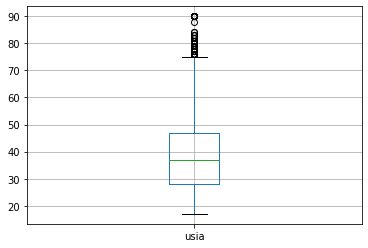

In [47]:
#pencarian outlier menggunakan boxplot
train.boxplot(column=["usia"]).plot()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='usia', ylabel='Density'>

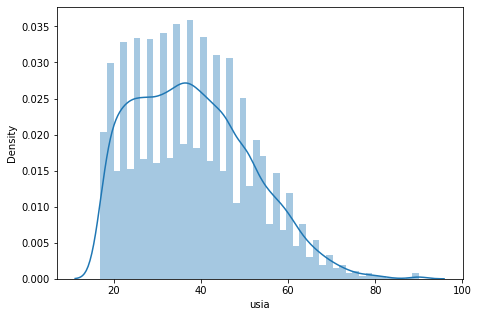

In [48]:
#pencarian outlier menggunakan pendekatan iqr
##1
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(train['usia'])

In [49]:
##2
percentile25 = train['usia'].quantile(0.25)
percentile75 = train['usia'].quantile(0.75)
iqr = percentile75 - percentile25

In [50]:
##3
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [51]:
##4
upper_limit

75.5

In [52]:
##5
lower_limit

-0.5

In [53]:
##6
train[train['usia'] > upper_limit]

Id  usia     tipe_pekerjaan pendidikan_terakhir  lama_pendidikan  \
94        94    79            Startup                  S2               14   
207      207    90            Startup                  S1               13   
240      240    90            Startup         Keprofesian               15   
349      349    77            Startup                  S2               14   
439      439    84  Pengusaha mandiri                  D4               10   
...      ...   ...                ...                 ...              ...   
14576  14576    76            Startup                 SMA                6   
14585  14585    90            Startup                 SMA                6   
14612  14612    81            Startup                  SD                2   
14624  14624    82    Pekerja mandiri                 SMA                9   
14651  14651    78  Pengusaha mandiri                 SMA                7   

      status_perkawinan  pekerjaan jenis_kelamin  jam_kerja_per_minggu  \
94       Pasangan Sipil       Guru          Pria                    40   
207      Pasangan Sipil      Sales          Pria                    15   
240      Pasangan Sipil  Professor          Pria                    72   
349      Pasangan Sipil       Guru          Pria                     6   
439      Pasangan Sipil      Sales          Pria                    35   
...                 ...        ...           ...                   ...   
14576    Pasangan Sipil       Guru          Pria                    40   
14585    Pasangan Sipil   Direktur          Pria                    40   
14612    Pasangan Sipil  Professor          Pria                    15   
14624    Pasangan Sipil     Montir          Pria                    40   
14651    Pasangan Sipil   Direktur          Pria                    10   

             asal_daerah  Category  
94      kalimantan timur         1  
207              jakarta         1  
240              jakarta         1  
349              jakarta         1  
439              jakarta         1  
...                  ...       ...  
14576            jakarta         0  
14585            jakarta         0  
14612   kalimantan timur         0  
14624  kalimantan tengah         0  
14651            jakarta         0  

[77 rows x 11 columns]

In [54]:
##7
train[train['usia'] < lower_limit]

Empty DataFrame
Columns: [Id, usia, tipe_pekerjaan, pendidikan_terakhir, lama_pendidikan, status_perkawinan, pekerjaan, jenis_kelamin, jam_kerja_per_minggu, asal_daerah, Category]
Index: []

In [55]:
##8 variabel baru untuk data set yang telah dibersihkan outliernya
new_train = train[train['usia'] < upper_limit]

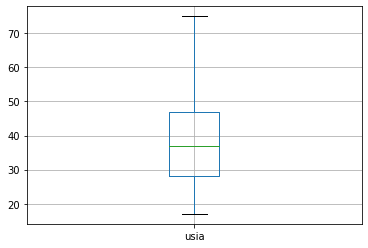

In [56]:
##9 Boxplot yang baru setelah membersihkan outlier
new_train.boxplot(column=["usia"]).plot()
plt.show()

In [57]:
##10 jumlah baris setelah dibersihkan outliernya
new_train.shape

(15088, 11)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

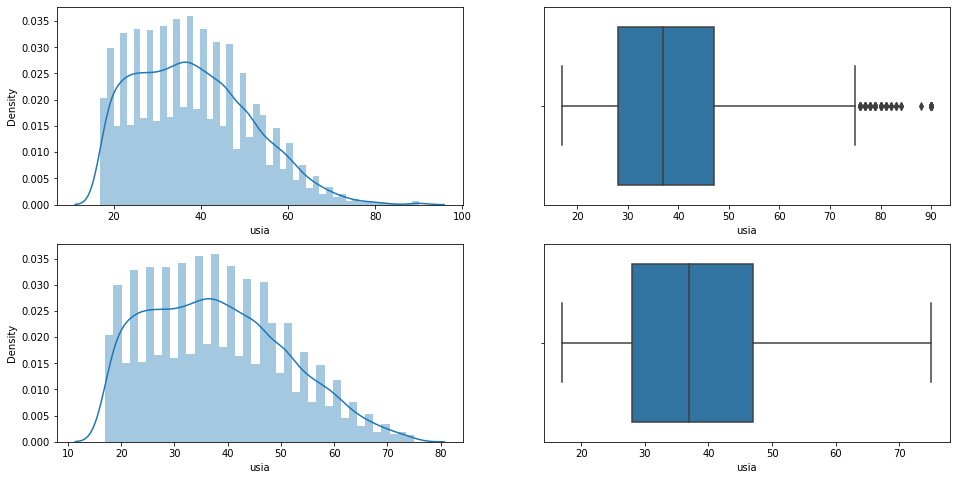

In [58]:
##11 Perbandingan grafik sebelum dan sesudah dibersihkan
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(train['usia'])
plt.subplot(2,2,2)
sns.boxplot(train['usia'])
plt.subplot(2,2,3)
sns.distplot(new_train['usia'])
plt.subplot(2,2,4)
sns.boxplot(new_train['usia'])
plt.show()

In [59]:
##12 capping data
new_train_cap = train.copy()
new_train_cap['usia'] = np.where(
    new_train_cap['usia'] > upper_limit,
    upper_limit,
    np.where(
        new_train_cap['usia'] < lower_limit,
        lower_limit,
        new_train_cap['usia']
    )
)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

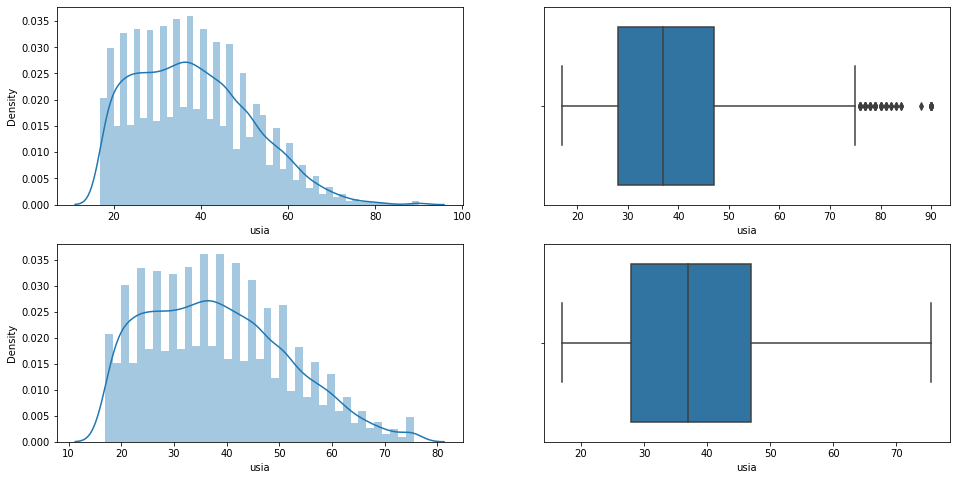

In [60]:
##13 grafik setelah dicap
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(train['usia'])
plt.subplot(2,2,2)
sns.boxplot(train['usia'])
plt.subplot(2,2,3)
sns.distplot(new_train_cap['usia'])
plt.subplot(2,2,4)
sns.boxplot(new_train_cap['usia'])
plt.show()

# Penjelasan analisis data outlier train.csv
Setelah dilakukan proses untuk mencari data outlier pada variabel usia dengan 2 metode berbeda, kami menemukan data outlier yaitu diatas usia 75 tahun. Jumlah orang yang berusia diatas 75 tahun berjumlah 77 orang. Sedangkan untuk data outlier yang berada dibawah pagar bawah tidak ada. Kami melakukan penghapusan data untuk ke semua data outlier dan mendapatkan data yang lebih bersih seperti yang terlihat pada grafik, dapat dilihat untuk boxplot dan distplot yang bawah sudah tidak memiliki data outlier lagi. Untuk persebaran usia paling banyak berada pada rentang 25-50 tahun. Untuk nilai tengahnya atau median berada di usia 37 tahun. Untuk quartil 1 yaitu 28 tahun dan quartil 3 47 tahun. Selain itu didapatkan juga pagar atas 75.5 tahun dan pagar bawah 0 tahun.

In [61]:
#Memeriksa jumlah baris
test.shape[0]

2406

[]

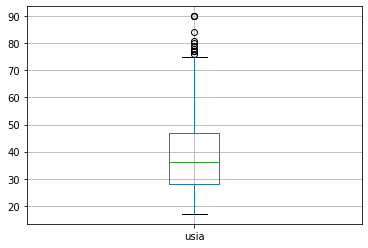

In [62]:
#Pencarian outlier menggunakan boxplot
test.boxplot(column=["usia"]).plot()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='usia', ylabel='Density'>

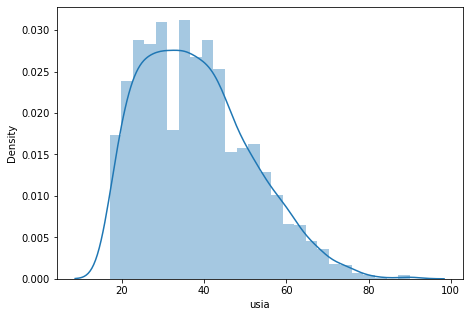

In [63]:
#pencarian outlier menggunakan pendekatan iqr
##1
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(test['usia'])

In [64]:
##2
percentiles25 = test['usia'].quantile(0.25)
percentiles75 = test['usia'].quantile(0.75)
iqr = percentiles75 - percentiles25

In [65]:
##3
upper_limit2 = percentiles75 + 1.5 * iqr
lower_limit2 = percentile25 - 1.5 * iqr

In [66]:
upper_limit2

75.5

In [67]:
lower_limit2

-0.5

In [68]:
##6
test[test['usia'] > upper_limit2].shape

(12, 10)

In [69]:
##7
test[test['usia'] < lower_limit2].shape

(0, 10)

In [70]:
##8 variabel baru untuk data set yang telah dibersihkan outliernya
new_test = test[test['usia'] < upper_limit2]

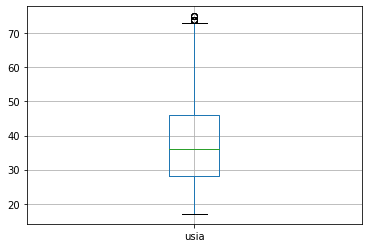

In [71]:
##9 Boxplot yang baru setelah membersihkan outlier
new_test.boxplot(column=["usia"]).plot()
plt.show()

In [72]:
##10 jumlah baris setelah dibersihkan outliernya
new_test.shape

(2394, 10)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

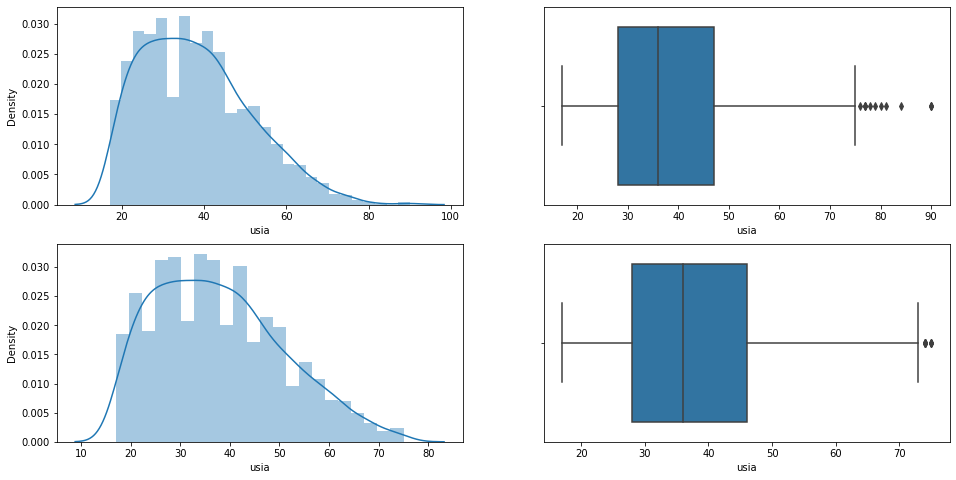

In [73]:
##11 Perbandingan grafik sebelum dan sesudah dibersihkan
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(test['usia'])
plt.subplot(2,2,2)
sns.boxplot(test['usia'])
plt.subplot(2,2,3)
sns.distplot(new_test['usia'])
plt.subplot(2,2,4)
sns.boxplot(new_test['usia'])
plt.show()

In [74]:
##12 capping data
new_test_cap = test.copy()
new_test_cap['usia'] = np.where(
    new_test_cap['usia'] > upper_limit2,
    upper_limit2,
    np.where(
        new_test_cap['usia'] < lower_limit2,
        lower_limit2,
        new_test_cap['usia']
    )
)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

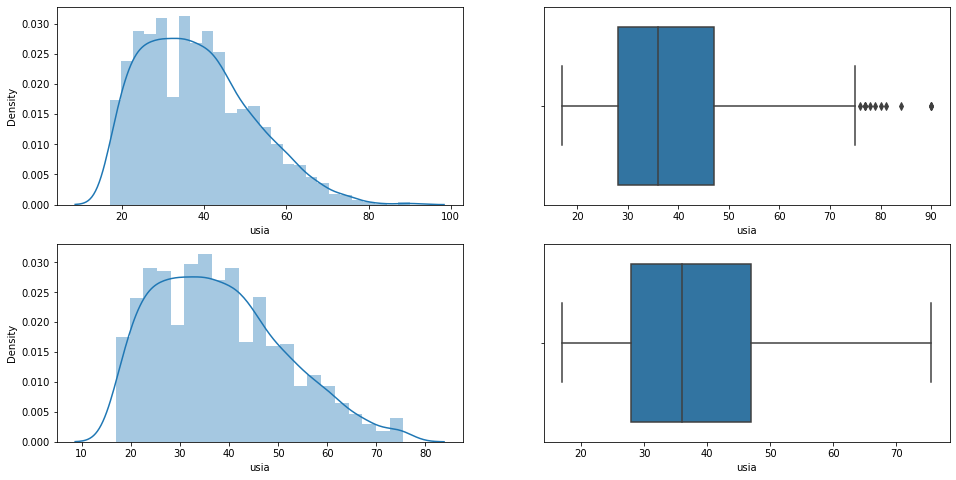

In [75]:
##13 grafik setelah dicap
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(test['usia'])
plt.subplot(2,2,2)
sns.boxplot(test['usia'])
plt.subplot(2,2,3)
sns.distplot(new_test_cap['usia'])
plt.subplot(2,2,4)
sns.boxplot(new_test_cap['usia'])
plt.show()

# Penjelasan analisis data outlier test.csv
Setelah dilakukan proses untuk mencari data outlier pada variabel usia dengan 2 metode berbeda, kami menemukan data outlier yaitu diatas usia 75 tahun. Jumlah orang yang berusia diatas 75 tahun berjumlah 12 orang. Sedangkan untuk data outlier yang berada dibawah pagar bawah tidak ada. Kami melakukan penghapusan data untuk ke semua data outlier dan mendapatkan data yang lebih bersih seperti yang terlihat pada grafik, dapat dilihat untuk boxplot dan distplot yang bawah sudah tidak memiliki data outlier lagi. Untuk persebaran usia paling banyak berada pada rentang 25-50 tahun. Untuk nilai tengahnya atau median berada di usia 37 tahun. Untuk quartil 1 yaitu 28 tahun dan quartil 3 47 tahun. Selain itu didapatkan juga pagar atas 75.5 tahun dan pagar bawah 0 tahun.

## Analisis Tambahan
Analisislah data berikut, carilah insight menarik atau informasi yang dapat dibagikan kepada kami :)

path 1 : '/kaggle/input/sekolahdatambc2021/titanic_data.csv'

path 2 : '/kaggle/input/sekolahdatambc2021/data_mix.csv'

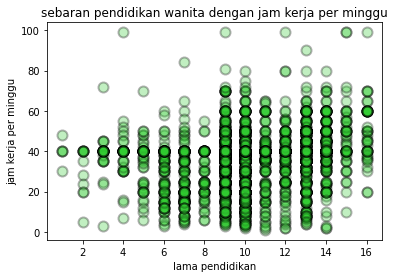

In [76]:

train2 = pd.read_csv("/kaggle/input/sekolahdatambc2021/train.csv")
wanita = train2[train2['jenis_kelamin']=='Wanita'] 

x = wanita['lama_pendidikan']
y = wanita['jam_kerja_per_minggu']

plt.scatter(x=x, y=y, s=100, c='limegreen', edgecolor='black', linewidth=2, alpha=0.3)


plt.title("sebaran pendidikan wanita dengan jam kerja per minggu")
plt.xlabel("lama pendidikan")
plt.ylabel("jam kerja per minggu")
plt.show()

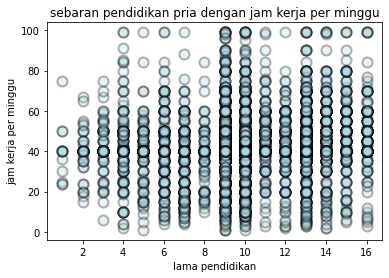

In [77]:
pria = train2[train2['jenis_kelamin']=='Pria'] 

x = pria['lama_pendidikan']
y = pria['jam_kerja_per_minggu']

plt.scatter(x=x, y=y, s=100, c='lightblue', edgecolor='black', linewidth=2, alpha=0.3)


plt.title("sebaran pendidikan pria dengan jam kerja per minggu")
plt.xlabel("lama pendidikan")
plt.ylabel("jam kerja per minggu")
plt.show()

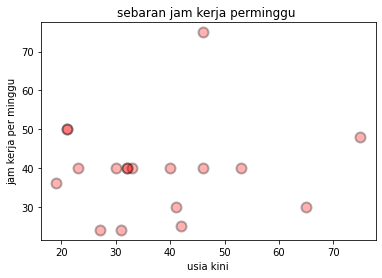

In [78]:
TK = train2[train2['pendidikan_terakhir']=='TK']

x = TK['usia']
y = TK['jam_kerja_per_minggu']

plt.scatter(x=x, y=y, s=100, c='red', edgecolor='black', linewidth=2, alpha=0.3)


plt.title("sebaran jam kerja perminggu ")
plt.xlabel("usia kini")
plt.ylabel("jam kerja per minggu")
plt.show()

In [79]:
train2.groupby('pekerjaan').mean()

Id       usia  lama_pendidikan  invest_untung  \
pekerjaan                                                           
Admin      8636.599031  35.846760        10.213204    7627.500000   
Direktur   5631.563888  42.277257        11.605821   16824.784836   
Guru       8533.912162  37.064189         8.636261    5450.727273   
Montir     7833.731608  39.190766         9.100964    8532.673835   
OB         9130.614679  32.143731         8.461774    3950.810345   
Pembantu   7699.971510  40.231719         9.228870    8009.111888   
Professor  5915.290120  40.882410        13.059277   19716.878981   
Sales      7398.931208  37.325503        10.375280   15704.106007   
Teknisi    6860.819413  36.677201        11.200903    7654.826087   

           invest_rugi  jam_kerja_per_minggu  Category  
pekerjaan                                               
Admin      1801.528302             37.818292  0.170200  
Direktur   1910.257028             45.873212  0.557967  
Guru       1798.326923             41.073198  0.171171  
Montir     1853.200000             42.616946  0.258245  
OB         1855.074074             37.915902  0.068807  
Pembantu   1838.344828             44.312441  0.268756  
Professor  1913.350394             43.108916  0.521446  
Sales      1880.759259             41.502796  0.321029  
Teknisi    1750.638298             39.693002  0.352144

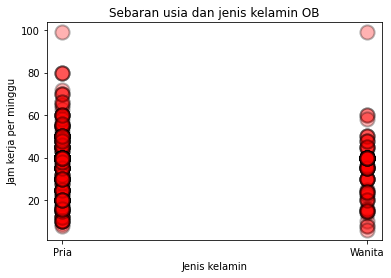

In [80]:
OB = train2[train2['pekerjaan']=='OB']

x = OB['jenis_kelamin']
y = OB['jam_kerja_per_minggu']

plt.scatter(x=x, y=y, s=200, c='red', edgecolor='black', linewidth=2, alpha=0.3)


plt.title("Sebaran usia dan jenis kelamin OB")
plt.xlabel("Jenis kelamin")
plt.ylabel("Jam kerja per minggu")
plt.show()

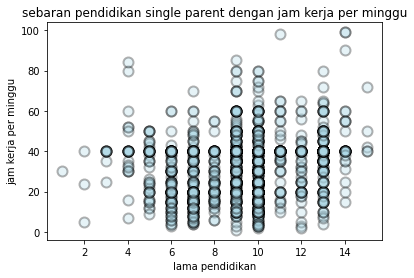

In [81]:
SP = train2[train2['status_dalam_keluarga']=='Single Parent']

x = SP['lama_pendidikan']
y = SP['jam_kerja_per_minggu']

plt.scatter(x=x, y=y, s=100, c='lightblue', edgecolor='black', linewidth=2, alpha=0.3)


plt.title("sebaran pendidikan single parent dengan jam kerja per minggu")
plt.xlabel("lama pendidikan")
plt.ylabel("jam kerja per minggu")
plt.show()

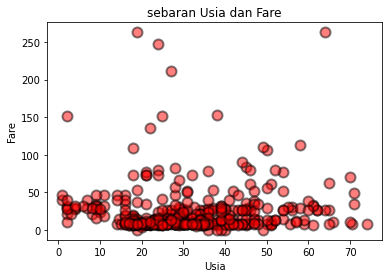

In [82]:
titanic = pd.read_csv("../input/sekolahdatambc2021/titanic_data.csv")
mati = titanic[titanic['Survived']==0]

x = mati['Age']
y = mati['Fare']

plt.scatter(x=x, y=y, s=100, c='red', edgecolor='black', linewidth=2, alpha=0.5)


plt.title("sebaran Usia dan Fare")
plt.xlabel("Usia")
plt.ylabel("Fare")
plt.show()

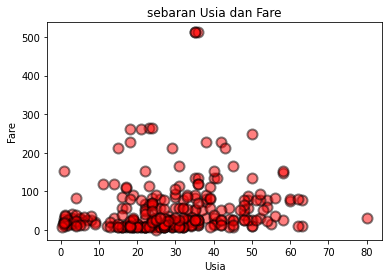

In [83]:
survived = titanic[titanic['Survived']==1]

x = survived['Age']
y = survived['Fare']

plt.scatter(x=x, y=y, s=100, c='red', edgecolor='black', linewidth=2, alpha=0.5)


plt.title("sebaran Usia dan Fare")
plt.xlabel("Usia")
plt.ylabel("Fare")
plt.show()

kesimpulannya: kaya tidak menjamin selamat, yang fare mahal banyak mati

In [84]:
sex = titanic.groupby('Sex').describe()
sex

PassengerId                                                             \
             count        mean         std  min     25%    50%     75%    max   
Sex                                                                             
female       314.0  431.028662  256.846324  2.0  231.75  414.5  641.25  889.0   
male         577.0  454.147314  257.486139  1.0  222.00  464.0  680.00  891.0   

       Survived            ... Parch        Fare                              \
          count      mean  ...   75%  max  count       mean        std   min   
Sex                        ...                                                 
female    314.0  0.742038  ...   1.0  6.0  314.0  44.479818  57.997698  6.75   
male      577.0  0.188908  ...   0.0  5.0  577.0  25.523893  43.138263  0.00   

                                          
              25%   50%    75%       max  
Sex                                       
female  12.071875  23.0  55.00  512.3292  
male     7.895800  10.5  26.55  512.3292  

[2 rows x 56 columns]

In [85]:
mati[mati['Sex']=='male'].count()

PassengerId    468
Survived       468
Pclass         468
Name           468
Sex            468
Age            360
SibSp          468
Parch          468
Ticket         468
Fare           468
Cabin           62
Embarked       468
dtype: int64

In [86]:
mati[mati['Sex']=='female'].count()

PassengerId    81
Survived       81
Pclass         81
Name           81
Sex            81
Age            64
SibSp          81
Parch          81
Ticket         81
Fare           81
Cabin           6
Embarked       81
dtype: int64

kesimpulan: cowo lebih banyak yg mati (468/577) karena yang nyelamatin seksis jadi yang diselamatin cewe sama anak-anak dulu

# **Analisis Path 2**

In [87]:
#1
mix = pd.read_csv("../input/sekolahdatambc2021/data_mix.csv")

In [88]:
#2 Cek Data
mix

Unnamed: 0      Nama_Surveyor NIM_Surveyor Kelas_Surveyor  \
0              0  Vania Alya Qonita     18219090            STI   
1              1          Abu Hanif     13219053        Elektro   
2              2  Nicholas Darmawan     18219028            STI   
3              3  Nicholas Darmawan     18219028            STI   
4              4     Gwyneth Winata     10119075            STI   
...          ...                ...          ...            ...   
2015        2015   Sidartha Prastya     13219033        Elektro   
2016        2016     Muhamad Taruna     13219030        Elektro   
2017        2017            cswadec     19128312            STI   
2018        2018               Jjjj         2222        Elektro   
2019        2019              Abbas     25020002        Elektro   

       Nama_Responden Jenis_Kelamin   Usia Pendidikan_Terakhir  \
0          indra bayu     Laki-laki  31-40                  S2   
1     Mediana Safira      Perempuan  15-20                 SMA   
2       Dewi Nathania     Perempuan  15-20                 SMA   
3       Dewi Nathania     Perempuan  15-20                 SMA   
4      Gwyneth Winata     Perempuan  15-20                 SMA   
...               ...           ...    ...                 ...   
2015                .     Laki-laki  15-20                 SMA   
2016              NaN           NaN    NaN                 NaN   
2017            jigur     Perempuan    >50                  SD   
2018               Hh     Laki-laki  15-20                  S1   
2019            Abbas     Laki-laki  15-20                  S1   

                                 Pekerjaan Penghasilan_per_bulan  ...  \
0                          Karyawan Swasta             > 10 juta  ...   
1                        Pelajar/Mahasiswa              < 2 juta  ...   
2                        Pelajar/Mahasiswa              < 2 juta  ...   
3                        Pelajar/Mahasiswa              < 2 juta  ...   
4                        Pelajar/Mahasiswa              < 2 juta  ...   
...                                    ...                   ...  ...   
2015                     Pelajar/Mahasiswa              < 2 juta  ...   
2016                                   NaN                   NaN  ...   
2017  Profesi (Dokter,Dosen,Pengacara,dll)              < 2 juta  ...   
2018                       Ibu Rumahtangga      5 juta - 10 juta  ...   
2019                     Pelajar/Mahasiswa              < 2 juta  ...   

           Tujuan_mengajukan_pinjaman Nominal_Pinjaman Durasi_proses_pinjaman  \
0                              ['No']        > 10 juta                < 1 jam   
1                                 NaN              NaN                    NaN   
2                                 NaN              NaN                    NaN   
3                                 NaN              NaN                    NaN   
4     ['Untuk memberi dana pinjaman']         < 1 juta               > 3 hari   
...                               ...              ...                    ...   
2015                              NaN              NaN                    NaN   
2016                              NaN              NaN                    NaN   
2017                              NaN              NaN                    NaN   
2018                              NaN              NaN                    NaN   
2019  ['Untuk memberi dana pinjaman']         < 1 juta                < 1 jam   

     Jangka_waktu_pinjaman Proses_verivikasi_pinjaman  \
0                < 15 hari                  Tidak ada   
1                      NaN                        NaN   
2                      NaN                        NaN   
3                      NaN                        NaN   
4        6 bulan - 1 tahun                  Tidak ada   
...                    ...                        ...   
2015                   NaN                        NaN   
2016                   NaN                        NaN   
2017                   NaN                   

In [89]:
#3
mix.head()

Unnamed: 0      Nama_Surveyor NIM_Surveyor Kelas_Surveyor   Nama_Responden  \
0           0  Vania Alya Qonita     18219090            STI       indra bayu   
1           1          Abu Hanif     13219053        Elektro  Mediana Safira    
2           2  Nicholas Darmawan     18219028            STI    Dewi Nathania   
3           3  Nicholas Darmawan     18219028            STI    Dewi Nathania   
4           4     Gwyneth Winata     10119075            STI   Gwyneth Winata   

  Jenis_Kelamin   Usia Pendidikan_Terakhir          Pekerjaan  \
0     Laki-laki  31-40                  S2    Karyawan Swasta   
1     Perempuan  15-20                 SMA  Pelajar/Mahasiswa   
2     Perempuan  15-20                 SMA  Pelajar/Mahasiswa   
3     Perempuan  15-20                 SMA  Pelajar/Mahasiswa   
4     Perempuan  15-20                 SMA  Pelajar/Mahasiswa   

  Penghasilan_per_bulan  ...       Tujuan_mengajukan_pinjaman  \
0             > 10 juta  ...                           ['No']   
1              < 2 juta  ...                              NaN   
2              < 2 juta  ...                              NaN   
3              < 2 juta  ...                              NaN   
4              < 2 juta  ...  ['Untuk memberi dana pinjaman']   

  Nominal_Pinjaman Durasi_proses_pinjaman Jangka_waktu_pinjaman  \
0        > 10 juta                < 1 jam             < 15 hari   
1              NaN                    NaN                   NaN   
2              NaN                    NaN                   NaN   
3              NaN                    NaN                   NaN   
4         < 1 juta               > 3 hari     6 bulan - 1 tahun   

  Proses_verivikasi_pinjaman           Masalah_fintech_lending  \
0                  Tidak ada                  ['Tidak pernah']   
1                        NaN                               NaN   
2                        NaN                               NaN   
3                        NaN                               NaN   
4                  Tidak ada  ['Tidak pernah', 'Bunga tinggi']   

  Fintech_market_provisioning Fintech_investasi      Regulasi_OJK  \
0            ['Tidak pernah']       ['Bareksa']        Mengetahui   
1                         NaN               NaN               NaN   
2            ['Tidak pernah']  ['Tidak pernah']  Tidak Mengetahui   
3                         NaN               NaN               NaN   
4            ['Tidak pernah']         ['Bibit']        Mengetahui   

  Pertimbangan_Regulasi_OJK  
0                        Ya  
1                       NaN  
2                        Ya  
3                       NaN  
4                        Ya  

[5 rows x 114 columns]

In [90]:
#4
mix.tail()

Unnamed: 0     Nama_Surveyor NIM_Surveyor Kelas_Surveyor Nama_Responden  \
2015        2015  Sidartha Prastya     13219033        Elektro              .   
2016        2016    Muhamad Taruna     13219030        Elektro            NaN   
2017        2017           cswadec     19128312            STI          jigur   
2018        2018              Jjjj         2222        Elektro             Hh   
2019        2019             Abbas     25020002        Elektro          Abbas   

     Jenis_Kelamin   Usia Pendidikan_Terakhir  \
2015     Laki-laki  15-20                 SMA   
2016           NaN    NaN                 NaN   
2017     Perempuan    >50                  SD   
2018     Laki-laki  15-20                  S1   
2019     Laki-laki  15-20                  S1   

                                 Pekerjaan Penghasilan_per_bulan  ...  \
2015                     Pelajar/Mahasiswa              < 2 juta  ...   
2016                                   NaN                   NaN  ...   
2017  Profesi (Dokter,Dosen,Pengacara,dll)              < 2 juta  ...   
2018                       Ibu Rumahtangga      5 juta - 10 juta  ...   
2019                     Pelajar/Mahasiswa              < 2 juta  ...   

           Tujuan_mengajukan_pinjaman Nominal_Pinjaman Durasi_proses_pinjaman  \
2015                              NaN              NaN                    NaN   
2016                              NaN              NaN                    NaN   
2017                              NaN              NaN                    NaN   
2018                              NaN              NaN                    NaN   
2019  ['Untuk memberi dana pinjaman']         < 1 juta                < 1 jam   

     Jangka_waktu_pinjaman Proses_verivikasi_pinjaman Masalah_fintech_lending  \
2015                   NaN                        NaN                     NaN   
2016                   NaN                        NaN                     NaN   
2017                   NaN                        NaN                     NaN   
2018                   NaN                        NaN                     NaN   
2019           1 - 3 bulan                  Tidak ada        ['Tidak pernah']   

     Fintech_market_provisioning Fintech_investasi Regulasi_OJK  \
2015                         NaN               NaN          NaN   
2016                         NaN               NaN          NaN   
2017                         NaN               NaN          NaN   
2018                         NaN               NaN          NaN   
2019            ['Tidak pernah']  ['Tidak pernah']   Mengetahui   

     Pertimbangan_Regulasi_OJK  
2015                       NaN  
2016                       NaN  
2017                       NaN  
2018                       NaN  
2019                        Ya  

[5 rows x 114 columns]

In [91]:
#5 Cek data kategorikal
mix.dtypes

Unnamed: 0                      int64
Nama_Surveyor                  object
NIM_Surveyor                   object
Kelas_Surveyor                 object
Nama_Responden                 object
                                ...  
Masalah_fintech_lending        object
Fintech_market_provisioning    object
Fintech_investasi              object
Regulasi_OJK                   object
Pertimbangan_Regulasi_OJK      object
Length: 114, dtype: object

In [92]:
#6 Kelompok berdasarkan pendidikan terakhir SMA
mix_groupby = mix.groupby('Pendidikan_Terakhir')
mix_groupby.get_group('SMA')

Unnamed: 0       Nama_Surveyor NIM_Surveyor Kelas_Surveyor  \
1              1           Abu Hanif     13219053        Elektro   
2              2   Nicholas Darmawan     18219028            STI   
3              3   Nicholas Darmawan     18219028            STI   
4              4      Gwyneth Winata     10119075            STI   
5              5      Gwyneth Winata     10119075            STI   
...          ...                 ...          ...            ...   
2006        2006        Muhammad Ali     13219017        Elektro   
2008        2008                  Jj           88        Elektro   
2009        2009        ahshjagsjhag     13219027        Elektro   
2011        2011  Dwi Ananda Sanbari     13219044        Elektro   
2015        2015    Sidartha Prastya     13219033        Elektro   

             Nama_Responden Jenis_Kelamin   Usia Pendidikan_Terakhir  \
1           Mediana Safira      Perempuan  15-20                 SMA   
2             Dewi Nathania     Perempuan  15-20                 SMA   
3             Dewi Nathania     Perempuan  15-20                 SMA   
4            Gwyneth Winata     Perempuan  15-20                 SMA   
5            Gwyneth Winata     Perempuan  15-20                 SMA   
...                     ...           ...    ...                 ...   
2006                 Taufik     Laki-laki  21-30                 SMA   
2008                     Hh     Laki-laki  15-20                 SMA   
2009                  saasa     Laki-laki  15-20                 SMA   
2011  Vinsi Nurlita Agustin     Perempuan  15-20                 SMA   
2015                      .     Laki-laki  15-20                 SMA   

              Pekerjaan Penghasilan_per_bulan  ...  \
1     Pelajar/Mahasiswa              < 2 juta  ...   
2     Pelajar/Mahasiswa              < 2 juta  ...   
3     Pelajar/Mahasiswa              < 2 juta  ...   
4     Pelajar/Mahasiswa              < 2 juta  ...   
5     Pelajar/Mahasiswa              < 2 juta  ...   
...                 ...                   ...  ...   
2006    Karyawan Swasta              < 2 juta  ...   
2008  Pelajar/Mahasiswa              < 2 juta  ...   
2009  Pelajar/Mahasiswa              < 2 juta  ...   
2011  Pelajar/Mahasiswa              < 2 juta  ...   
2015  Pelajar/Mahasiswa              < 2 juta  ...   

           Tujuan_mengajukan_pinjaman Nominal_Pinjaman Durasi_proses_pinjaman  \
1                                 NaN              NaN                    NaN   
2                                 NaN              NaN                    NaN   
3                                 NaN              NaN                    NaN   
4     ['Untuk memberi dana pinjaman']         < 1 juta               > 3 hari   
5                                 NaN              NaN                    NaN   
...                               ...              ...                    ...   
2006                              NaN              NaN                    NaN   
2008                              NaN              NaN                    NaN   
2009                              NaN              NaN                    NaN   
2011                              NaN              NaN                    NaN   
2015                              NaN              NaN                    NaN   

     Jangka_waktu_pinjaman Proses_verivikasi_pinjaman  \
1                      NaN                        NaN   
2                      NaN                        NaN   
3                      NaN                        NaN   
4        6 bulan - 1 tahun                  Tidak ada   
5                      NaN                        NaN   
...                    ...                        ...   
2006                   NaN                        NaN   
2008                   NaN                        NaN   
2009                   NaN                        NaN   
2011                   NaN                        NaN   
2015                   NaN                        NaN   

               Ma

In [93]:
#7 Kelompok berdasaarkan pendidikan terakhir S2
mix_groupby.get_group('S2')

Unnamed: 0                    Nama_Surveyor NIM_Surveyor Kelas_Surveyor  \
0              0                Vania Alya Qonita     18219090            STI   
86            86                Vania Alya Qonita     18219090            STI   
115          115                     Afif Fahreza     18219058            STI   
126          126                     Afif Fahreza     18219058            STI   
134          134                     Afif Fahreza     18219058            STI   
135          135                     Afif Fahreza     18219058            STI   
137          137                     Afif Fahreza     18219058            STI   
138          138                     Afif fahreza     18219058            STI   
140          140                     Afif Fahreza     18219058            STI   
156          156               vaniya alya qonita     18219090            STI   
159          159                Kristofer Hartono     18219102            STI   
198          198                   Muhamad Taruna     13219030        Elektro   
249          249  Muhammad Jibril Kashani Zhillan     13219008        Elektro   
253          253            Patricia Dita Natasha     18219018            STI   
284          284                Kristofer Hartono     18219102            STI   
303          303          Muhammad Reza Nur Fauzi     18219064            STI   
322          322                  Shelly valencia     18219016            STI   
328          328                Vania Alya Qonita     18219090            STI   
348          348                Vania Alya Qonita     18219090            STI   
459          459          Paul marturia sihombing     18219044            STI   
549          549             Dimas Meisab Raditya     18219092            STI   
551          551              Dimas Meisab Radtya     18219092            STI   
572          572       Ikbar Allaam Faza Prasetya     13219042        Elektro   
615          615      Ikbar 'Allaam Faza Prasetya     13219042        Elektro   
627          627      Ikbar 'Allaam Faza Prasetya     13219042        Elektro   
671          671      DIRASIELLA DAMASARI HAMDANI     18219072            STI   
673          673      DIRASIELLA DAMASARI HAMDANI     18219072            STI   
691          691                 Aindrea Rayhan S     18219034            STI   
693          693                 Aindrea Rayhan S     18219034            STI   
698          698                   Aindrea Rayhan     18219034            STI   
703          703                   Aindrea Rayhan     18219034            STI   
725          725      DIRASIELLA DAMASARI HAMDANI     18219072            STI   
737          737      DIRASIELLA DAMASARI HAMDANI     18219072            STI   
838          838                      Agape D'sky     13219010        Elektro   
839          839                      Agape D'sky     13219010        Elektro   
934          934             Dimas Meisab Raditya     18219092            STI   
947          947             Dimas Meisab Raditya     18219092            STI   
1010        1010        Fathiyyah Maghfirah Teddy     18219106            STI   
1023        1023         Fathiyya Maghfirah Teddy     18219106            STI   
1032        1032         Fathiyya Maghfirah Teddy     18219106            STI   
1043        1043            Muhammad Hanif Adityo     13219027        Elektro   
1054        1054                             Fffc       162626        Elektro   
1066        1066         Fathiyya Maghfirah Teddy     18219106            STI   
1094        1094         Fathiyya Maghfirah Teddy     18219106            STI   
1269        1269             Dimas Meisab Raditya     18219092            STI   
1285        1285             Dimas Meisab Raditya     18219092            STI   
1288        1288                 Marcelino feihan     18219006            STI   
1348        1348            Dimas Meisyab Raditya     18219092            STI   
1441        1441        Cindy Amandan

In [94]:
#8 Pengelompokkan penghasilan perbulan dan pendidikan terakhir
mix[["Penghasilan_per_bulan","Pendidikan_Terakhir"]].groupby(["Pendidikan_Terakhir"]).Penghasilan_per_bulan.describe()

count unique        top  freq
Pendidikan_Terakhir                              
S1                    443      4   < 2 juta   167
S2                     53      4  > 10 juta    30
S3                      6      2  > 10 juta     5
SD                      9      2   < 2 juta     7
SMA                  1421      4   < 2 juta  1228
SMP                    22      4   < 2 juta    17

In [95]:
#9 Pengelompokkan penghasilan perbulan dan jenis kelamin
mix[["Penghasilan_per_bulan","Jenis_Kelamin"]].groupby(["Jenis_Kelamin"]).Penghasilan_per_bulan.describe()

count unique       top freq
Jenis_Kelamin                            
Laki-laki       974      4  < 2 juta  702
Perempuan       980      4  < 2 juta  723

In [96]:
#10 Pengelompokkan pekerjaan dan usia
mix[["Pekerjaan","Usia"]].groupby(["Usia"]).Pekerjaan.describe()

count unique                top  freq
Usia                                       
15-20  1480     12  Pelajar/Mahasiswa  1453
21-30   240     21  Pelajar/Mahasiswa    94
31-40    61      8    Karyawan Swasta    26
41-50   107     13    Karyawan Swasta    48
<15      19      5  Pelajar/Mahasiswa    15
>50      86     16    Karyawan Swasta    27

In [97]:
#11 Pengelompokkan penghasilan perbulan dan pekerjaan
mix[["Penghasilan_per_bulan","Pekerjaan"]].groupby(["Pekerjaan"]).Penghasilan_per_bulan.describe()

count unique               top  freq
Pekerjaan                                                                
Agen Asuransi                            0      0               NaN   NaN
BUMN                                     1      1         > 10 juta     1
Belum ada                                1      1          < 2 juta     1
Bumn                                     1      1  5 juta - 10 juta     1
Freelance Illustrator                    1      1  5 juta - 10 juta     1
Freelancer                               1      1  5 juta - 10 juta     1
Fresh Graduate                           1      1          < 2 juta     1
Gapyear                                  1      1          < 2 juta     1
Guru                                     3      1   2 juta - 5 juta     3
Guru Honorer                             1      1          < 2 juta     1
Guru les                                 1      1  5 juta - 10 juta     1
Honore                                   1      1          < 2 juta     1
Ibu Rumahtangga                         80      4          < 2 juta    28
Karyawan Swasta                        188      4  5 juta - 10 juta    67
Konsultan IT                             1      1         > 10 juta     1
Mahasiswa D3                             1      1   2 juta - 5 juta     1
Mahasiswa dan Pegawai Swasta             1      1   2 juta - 5 juta     1
Mahasiswa dan Pekerja                    1      1   2 juta - 5 juta     1
Pegawai BUMN                             4      2         > 10 juta     3
Pegawai Honorer                          2      1          < 2 juta     2
Pegawai Negeri                          39      4  5 juta - 10 juta    17
Pegawai bumn                             1      1  5 juta - 10 juta     1
Pelajar                                  1      1          < 2 juta     1
Pelajar/Mahasiswa                     1536      4          < 2 juta  1371
Pengajar                                 1      1   2 juta - 5 juta     1
Pengsiunan PNS                           1      1   2 juta - 5 juta     1
Pengusaha                               31      4   2 juta - 5 juta    12
Pensiun                                  1      1          < 2 juta     1
Pensiunan                                2      2          < 2 juta     1
Pensiunan  SPAM (PDAM)                   0      0               NaN   NaN
Penulis Freelancer                       1      1          < 2 juta     1
Petani                                   1      1   2 juta - 5 juta     1
Petani jagung                            1      1   2 juta - 5 juta     1
Profesi (Dokter,Dosen,Pengacara,dll)    36      4   2 juta - 5 juta    11
Sedang mencari pekerjaan                 1      1          < 2 juta     1
Supir Mobil                              1      1          < 2 juta     1
Swasra                                   1      1  5 juta - 10 juta     1
Trader Saham                             1      1   2 juta - 5 juta     1
Tukang ojeg                              1      1   2 juta - 5 juta     1
Wiraswasta                               4      2   2 juta - 5 juta     2
guru                                     1      1          < 2 juta     1
kARYAWAN BUMN                            1      1         > 10 juta     1
karyawan pemerintahan                    1      1  5 juta - 10 juta     1
menganggur                               1      1          < 2 juta     1
pegawai retail                           1      1   2 juta - 5 juta     1
ritel                                    1      1   2 juta - 5 juta     1
tenaga kontrak                           1      1   2 juta - 5 juta     1

In [98]:
#12 Pengelompokkan jenis kelamin dan pendidikan terakhir
mix[["Pendidikan_Terakhir","Jenis_Kelamin"]].groupby(["Jenis_Kelamin"]).Pendidikan_Terakhir.describe()

count unique  top freq
Jenis_Kelamin                       
Laki-laki       987      6  SMA  724
Perempuan      1001      6  SMA  720

In [99]:
#13 Pengelompokkan penghasilan perbulan dan usia
mix[["Penghasilan_per_bulan","Usia"]].groupby(["Usia"]).Penghasilan_per_bulan.describe()

count unique               top  freq
Usia                                      
15-20  1451      4          < 2 juta  1282
21-30   239      4          < 2 juta   101
31-40    61      4  5 juta - 10 juta    23
41-50   105      4         > 10 juta    44
<15      18      2          < 2 juta    17
>50      82      4         > 10 juta    32

In [100]:
#14 Pengelompokkan usia dan jenis kelamin
mix[["Usia","Jenis_Kelamin"]].groupby(["Jenis_Kelamin"]).Usia.describe()

count unique    top freq
Jenis_Kelamin                         
Laki-laki       990      6  15-20  753
Perempuan      1004      6  15-20  729

**Hasil Analisis**

Berdasarkan analisis yang telah kami lakukan, data responden berkisar diusia 15-20 tahun dengan perbandingan jenis kelamin yang sama besar. Kami mendapatkan data bahwa semakin tinggi pendidikan terakhir seseorang maka semakin besar juga penghasilan perbulannya. Untuk data ini sendiri, penghasilan terbesar dimiliki oleh orang yang berpendidikan S2 dan S3. Dan justru terjadi kesenjangan yang lumayan besar antara pendapatan yang berpendidikan S1 dengan S2. Selain itu, didapatkan juga data pendapatan untuk jenis kelamin, tidak ada perbedaan yang mencolok antara pendapatan perbulan laki-laki dengan perempuan. Untuk pekerjaan berdasarkan usia, cukup umum, tidak ada perbedaan mencolok, yaitu usia 15-30 sebagai pelajar dan usia 30 keatas sebagai karyawan swasta. Untuk penghasilan tertinggi, mayoritas dimiliki oleh orang yang bekerja sebagai pegawai BUMN dan Konsultan IT. Akan tetapi, dibeberapa pekerjaan lain seperti pegawai negeri, pegawai swasta, dan pengusaha juga memilki penghasilan diatas 10 juta. Terakhir, untuk penghasilan terbesar dimiliki oleh orang yang mayoritas berusia diatas 40 tahun.

## Milestone 2 : Feature Engineering dan Modelling

Tugas dapat dikerjakan dengan menggunakan dataset yang diberikan. Tugas baru dapat dikerjakan setelah 24 Juli 2021.

Pre-requisites : Materi day 3.

# Feature Engineering
Terdiri dari : 
1. Data Preparation
2. Handling Outlier
3. Rescalling

# Data Preparation (Telah Dilakukan pada soal nomor 2)

![../input/lampiran/null1.PNG](http://)

![../input/lampiran/null2.PNG](http://../input/lampiran/null1.PNG)

# **Normalization, Standardization, Encoding**

**Buat train.csv**

In [101]:
train_preprocessing = train
train_preprocessing

Id  usia       tipe_pekerjaan pendidikan_terakhir  lama_pendidikan  \
0          0    52    Pengusaha mandiri                 SMA                9   
1          1    64  Pemerintah provinsi                  S3               16   
2          2    53  Pemerintah nasional                 SMA                9   
3          3    47              Startup                 SMA                9   
4          4    29      Pekerja mandiri                  D4               10   
...      ...   ...                  ...                 ...              ...   
15160  15160    29              Startup                  S2               14   
15161  15161    18              Startup                 SMA                6   
15162  15162    40              Startup                 SMP                4   
15163  15163    59      Pekerja mandiri                 SMP                4   
15164  15164    38  Pemerintah provinsi                 SMA                9   

      status_perkawinan  pekerjaan jenis_kelamin  jam_kerja_per_minggu  \
0        Pasangan Sipil   Direktur        Wanita                    40   
1        Pasangan Sipil  Professor          Pria                    50   
2        Pasangan Sipil    Teknisi          Pria                    40   
3        Pasangan Sipil     Montir          Pria                    40   
4        Pasangan Sipil     Montir          Pria                    60   
...                 ...        ...           ...                   ...   
15160     Belum menikah  Professor        Wanita                    80   
15161     Belum menikah      Sales        Wanita                    40   
15162     Belum menikah       Guru          Pria                    40   
15163    Pasangan Sipil      Sales          Pria                    85   
15164             Cerai       Guru        Wanita                    20   

          asal_daerah  Category  
0             jakarta         1  
1      sumatera utara         1  
2                riau         1  
3             jakarta         1  
4             jakarta         1  
...               ...       ...  
15160         jakarta         0  
15161         jakarta         0  
15162         jakarta         0  
15163         jakarta         0  
15164         jakarta         0  

[15165 rows x 11 columns]

In [102]:
# Label encoding dilakukan pada jenis_kelamin

labelencoder = LabelEncoder()

train_preprocessing['jenis_kelamin'] = labelencoder.fit_transform(train_preprocessing['jenis_kelamin'])

In [103]:
# Label encoding sukses dijalankan

train_preprocessing

Id  usia       tipe_pekerjaan pendidikan_terakhir  lama_pendidikan  \
0          0    52    Pengusaha mandiri                 SMA                9   
1          1    64  Pemerintah provinsi                  S3               16   
2          2    53  Pemerintah nasional                 SMA                9   
3          3    47              Startup                 SMA                9   
4          4    29      Pekerja mandiri                  D4               10   
...      ...   ...                  ...                 ...              ...   
15160  15160    29              Startup                  S2               14   
15161  15161    18              Startup                 SMA                6   
15162  15162    40              Startup                 SMP                4   
15163  15163    59      Pekerja mandiri                 SMP                4   
15164  15164    38  Pemerintah provinsi                 SMA                9   

      status_perkawinan  pekerjaan  jenis_kelamin  jam_kerja_per_minggu  \
0        Pasangan Sipil   Direktur              1                    40   
1        Pasangan Sipil  Professor              0                    50   
2        Pasangan Sipil    Teknisi              0                    40   
3        Pasangan Sipil     Montir              0                    40   
4        Pasangan Sipil     Montir              0                    60   
...                 ...        ...            ...                   ...   
15160     Belum menikah  Professor              1                    80   
15161     Belum menikah      Sales              1                    40   
15162     Belum menikah       Guru              0                    40   
15163    Pasangan Sipil      Sales              0                    85   
15164             Cerai       Guru              1                    20   

          asal_daerah  Category  
0             jakarta         1  
1      sumatera utara         1  
2                riau         1  
3             jakarta         1  
4             jakarta         1  
...               ...       ...  
15160         jakarta         0  
15161         jakarta         0  
15162         jakarta         0  
15163         jakarta         0  
15164         jakarta         0  

[15165 rows x 11 columns]

In [104]:
# One hot encoding dilakukan pada tipe_pekerjaan, pendidikan_terakhir, status_perkawinan, pekerjaan, asal_daerah

train_preprocessing = pd.get_dummies(train_preprocessing, columns=['tipe_pekerjaan'])
train_preprocessing = pd.get_dummies(train_preprocessing, columns=['pendidikan_terakhir'])
train_preprocessing = pd.get_dummies(train_preprocessing, columns=['status_perkawinan'])
train_preprocessing = pd.get_dummies(train_preprocessing, columns=['pekerjaan'])
train_preprocessing = pd.get_dummies(train_preprocessing, columns=['asal_daerah'])

In [105]:
# One hot encoding sukses dijalankan

train_preprocessing

Id  usia  lama_pendidikan  jenis_kelamin  jam_kerja_per_minggu  \
0          0    52                9              1                    40   
1          1    64               16              0                    50   
2          2    53                9              0                    40   
3          3    47                9              0                    40   
4          4    29               10              0                    60   
...      ...   ...              ...            ...                   ...   
15160  15160    29               14              1                    80   
15161  15161    18                6              1                    40   
15162  15162    40                4              0                    40   
15163  15163    59                4              0                    85   
15164  15164    38                9              1                    20   

       Category  tipe_pekerjaan_Belum bekerja  tipe_pekerjaan_Pekerja mandiri  \
0             1                             0                               0   
1             1                             0                               0   
2             1                             0                               0   
3             1                             0                               0   
4             1                             0                               1   
...         ...                           ...                             ...   
15160         0                             0                               0   
15161         0                             0                               0   
15162         0                             0                               0   
15163         0                             0                               1   
15164         0                             0                               0   

       tipe_pekerjaan_Pemerintah kota  tipe_pekerjaan_Pemerintah nasional  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   1   
3                                   0                                   0   
4                                   0                                   0   
...                               ...                                 ...   
15160                               0                                   0   
15161                               0                                   0   
15162                               0                                   0   
15163                               0                                   0   
15164                               0                                   0   

       ...  asal_daerah_sulawesi barat  asal_daerah_sulawesi selatan  \
0      ...                           0                             0   
1      ...                           0                             0   
2      ...                           0                             0   
3      ...                           0                             0   
4      ...                           0                             0   
...    ...                         ...                           ...   
15160  ...                           0                             0   
15161  ...                           0                             0   
15162  ...                           0                             0   
15163  ...                           0                             0   
15164  ...                           0                             0   

       asal_daerah_sulawesi tengah  asal_daerah_sulawesi tenggara  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                        

In [106]:
# Standardisasi usia, lama_pendidikan, jam_kerja_per_minggu

train_preprocessing['usia'] = (train_preprocessing['usia'] - train_preprocessing['usia'].mean()) / train_preprocessing['usia'].std()
train_preprocessing['lama_pendidikan'] = (train_preprocessing['lama_pendidikan'] - train_preprocessing['lama_pendidikan'].mean()) / train_preprocessing['lama_pendidikan'].std()
train_preprocessing['jam_kerja_per_minggu'] = (train_preprocessing['jam_kerja_per_minggu'] - train_preprocessing['jam_kerja_per_minggu'].mean()) / train_preprocessing['jam_kerja_per_minggu'].std()

In [107]:
# Standardisasi berhasil dilakukan

train_preprocessing

Id      usia  lama_pendidikan  jenis_kelamin  jam_kerja_per_minggu  \
0          0  1.033928        -0.477678              1             -0.089155   
1          1  1.938968         2.219263              0              0.724054   
2          2  1.109348        -0.477678              0             -0.089155   
3          3  0.656828        -0.477678              0             -0.089155   
4          4 -0.700732        -0.092400              0              1.537263   
...      ...       ...              ...            ...                   ...   
15160  15160 -0.700732         1.448709              1              3.163682   
15161  15161 -1.530352        -1.633509              1             -0.089155   
15162  15162  0.128888        -2.404064              0             -0.089155   
15163  15163  1.561868        -2.404064              0              3.570287   
15164  15164 -0.021952        -0.477678              1             -1.715574   

       Category  tipe_pekerjaan_Belum bekerja  tipe_pekerjaan_Pekerja mandiri  \
0             1                             0                               0   
1             1                             0                               0   
2             1                             0                               0   
3             1                             0                               0   
4             1                             0                               1   
...         ...                           ...                             ...   
15160         0                             0                               0   
15161         0                             0                               0   
15162         0                             0                               0   
15163         0                             0                               1   
15164         0                             0                               0   

       tipe_pekerjaan_Pemerintah kota  tipe_pekerjaan_Pemerintah nasional  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   1   
3                                   0                                   0   
4                                   0                                   0   
...                               ...                                 ...   
15160                               0                                   0   
15161                               0                                   0   
15162                               0                                   0   
15163                               0                                   0   
15164                               0                                   0   

       ...  asal_daerah_sulawesi barat  asal_daerah_sulawesi selatan  \
0      ...                           0                             0   
1      ...                           0                             0   
2      ...                           0                             0   
3      ...                           0                             0   
4      ...                           0                             0   
...    ...                         ...                           ...   
15160  ...                           0                             0   
15161  ...                           0                             0   
15162  ...                           0                             0   
15163  ...                           0                             0   
15164  ...                           0                             0   

       asal_daerah_sulawesi tengah  asal_daerah_sulawesi tenggara  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3         

**Buat test.csv**

In [108]:
test_preprocessing = test
test_preprocessing

Id  usia       tipe_pekerjaan pendidikan_terakhir  lama_pendidikan  \
0        0    47              Startup                  D3               12   
1        1    29              Startup                 SMA                9   
2        2    40              Startup                  D4               10   
3        3    45              Startup                  D4               10   
4        4    40  Pemerintah nasional                  S1               13   
...    ...   ...                  ...                 ...              ...   
2401  2401    55              Startup                 SMA                9   
2402  2402    46      Pekerja mandiri                 SMA                9   
2403  2403    27              Startup                  D4               10   
2404  2404    34              Startup                 SMA                9   
2405  2405    41              Startup         Keprofesian               15   

     status_perkawinan pekerjaan jenis_kelamin  jam_kerja_per_minggu  \
0       Pasangan Sipil     Sales          Pria                    50   
1       Pasangan Sipil        OB        Wanita                    40   
2                Cerai      Guru          Pria                    40   
3       Pasangan Sipil    Montir          Pria                    40   
4        Belum menikah     Admin          Pria                    40   
...                ...       ...           ...                   ...   
2401             Cerai  Direktur        Wanita                    40   
2402    Pasangan Sipil  Pembantu          Pria                    40   
2403             Cerai    Montir        Wanita                    40   
2404             Cerai  Pembantu          Pria                    45   
2405    Pasangan Sipil     Admin          Pria                    40   

           asal_daerah  
0              jakarta  
1           jawa barat  
2              jakarta  
3              jakarta  
4       sulawesi utara  
...                ...  
2401           jakarta  
2402           jakarta  
2403           jakarta  
2404           jakarta  
2405  sulawesi selatan  

[2406 rows x 10 columns]

In [109]:
# Label encoding dilakukan pada jenis_kelamin

labelencoder = LabelEncoder()

test_preprocessing['jenis_kelamin'] = labelencoder.fit_transform(test_preprocessing['jenis_kelamin'])

In [110]:
# Label encoding sukses dijalankan

test_preprocessing

Id  usia       tipe_pekerjaan pendidikan_terakhir  lama_pendidikan  \
0        0    47              Startup                  D3               12   
1        1    29              Startup                 SMA                9   
2        2    40              Startup                  D4               10   
3        3    45              Startup                  D4               10   
4        4    40  Pemerintah nasional                  S1               13   
...    ...   ...                  ...                 ...              ...   
2401  2401    55              Startup                 SMA                9   
2402  2402    46      Pekerja mandiri                 SMA                9   
2403  2403    27              Startup                  D4               10   
2404  2404    34              Startup                 SMA                9   
2405  2405    41              Startup         Keprofesian               15   

     status_perkawinan pekerjaan  jenis_kelamin  jam_kerja_per_minggu  \
0       Pasangan Sipil     Sales              0                    50   
1       Pasangan Sipil        OB              1                    40   
2                Cerai      Guru              0                    40   
3       Pasangan Sipil    Montir              0                    40   
4        Belum menikah     Admin              0                    40   
...                ...       ...            ...                   ...   
2401             Cerai  Direktur              1                    40   
2402    Pasangan Sipil  Pembantu              0                    40   
2403             Cerai    Montir              1                    40   
2404             Cerai  Pembantu              0                    45   
2405    Pasangan Sipil     Admin              0                    40   

           asal_daerah  
0              jakarta  
1           jawa barat  
2              jakarta  
3              jakarta  
4       sulawesi utara  
...                ...  
2401           jakarta  
2402           jakarta  
2403           jakarta  
2404           jakarta  
2405  sulawesi selatan  

[2406 rows x 10 columns]

In [111]:
# One hot encoding dilakukan pada tipe_pekerjaan, pendidikan_terakhir, status_perkawinan, pekerjaan, asal_daerah

test_preprocessing = pd.get_dummies(test_preprocessing, columns=['tipe_pekerjaan'])
test_preprocessing = pd.get_dummies(test_preprocessing, columns=['pendidikan_terakhir'])
test_preprocessing = pd.get_dummies(test_preprocessing, columns=['status_perkawinan'])
test_preprocessing = pd.get_dummies(test_preprocessing, columns=['pekerjaan'])
test_preprocessing = pd.get_dummies(test_preprocessing, columns=['asal_daerah'])

In [112]:
# One hot encoding sukses dijalankan

test_preprocessing

Id  usia  lama_pendidikan  jenis_kelamin  jam_kerja_per_minggu  \
0        0    47               12              0                    50   
1        1    29                9              1                    40   
2        2    40               10              0                    40   
3        3    45               10              0                    40   
4        4    40               13              0                    40   
...    ...   ...              ...            ...                   ...   
2401  2401    55                9              1                    40   
2402  2402    46                9              0                    40   
2403  2403    27               10              1                    40   
2404  2404    34                9              0                    45   
2405  2405    41               15              0                    40   

      tipe_pekerjaan_Belum bekerja  tipe_pekerjaan_Pekerja mandiri  \
0                                0                               0   
1                                0                               0   
2                                0                               0   
3                                0                               0   
4                                0                               0   
...                            ...                             ...   
2401                             0                               0   
2402                             0                               1   
2403                             0                               0   
2404                             0                               0   
2405                             0                               0   

      tipe_pekerjaan_Pemerintah kota  tipe_pekerjaan_Pemerintah nasional  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   1   
...                              ...                                 ...   
2401                               0                                   0   
2402                               0                                   0   
2403                               0                                   0   
2404                               0                                   0   
2405                               0                                   0   

      tipe_pekerjaan_Pemerintah provinsi  ...  asal_daerah_papua barat  \
0                                      0  ...                        0   
1                                      0  ...                        0   
2                                      0  ...                        0   
3                                      0  ...                        0   
4                                      0  ...                        0   
...                                  ...  ...                      ...   
2401                                   0  ...                        0   
2402                                   0  ...                        0   
2403                                   0  ...                        0   
2404                                   0  ...                        0   
2405                                   0  ...                        0   

      asal_daerah_riau  asal_daerah_singapura  asal_daerah_sulawesi selatan  \
0                    0                      0                             0   
1                    0                      0                             0   
2                    0                      0                             0   
3                    0                      0                             0   
4                    0                      0                             0   
..

In [113]:
# Standardisasi usia, lama_pendidikan, jam_kerja_per_minggu

test_preprocessing['usia'] = (test_preprocessing['usia'] - test_preprocessing['usia'].mean()) / test_preprocessing['usia'].std()
test_preprocessing['lama_pendidikan'] = (test_preprocessing['lama_pendidikan'] - test_preprocessing['lama_pendidikan'].mean()) / test_preprocessing['lama_pendidikan'].std()
test_preprocessing['jam_kerja_per_minggu'] = (test_preprocessing['jam_kerja_per_minggu'] - test_preprocessing['jam_kerja_per_minggu'].mean()) / test_preprocessing['jam_kerja_per_minggu'].std()

In [114]:
# Standardisasi berhasil dilakukan

test_preprocessing

Id      usia  lama_pendidikan  jenis_kelamin  jam_kerja_per_minggu  \
0        0  0.670927         0.685311              0              0.716126   
1        1 -0.687933        -0.492164              1             -0.086987   
2        2  0.142481        -0.099673              0             -0.086987   
3        3  0.519942        -0.099673              0             -0.086987   
4        4  0.142481         1.077803              0             -0.086987   
...    ...       ...              ...            ...                   ...   
2401  2401  1.274864        -0.492164              1             -0.086987   
2402  2402  0.595435        -0.492164              0             -0.086987   
2403  2403 -0.838917        -0.099673              1             -0.086987   
2404  2404 -0.310472        -0.492164              0              0.314569   
2405  2405  0.217974         1.862786              0             -0.086987   

      tipe_pekerjaan_Belum bekerja  tipe_pekerjaan_Pekerja mandiri  \
0                                0                               0   
1                                0                               0   
2                                0                               0   
3                                0                               0   
4                                0                               0   
...                            ...                             ...   
2401                             0                               0   
2402                             0                               1   
2403                             0                               0   
2404                             0                               0   
2405                             0                               0   

      tipe_pekerjaan_Pemerintah kota  tipe_pekerjaan_Pemerintah nasional  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   1   
...                              ...                                 ...   
2401                               0                                   0   
2402                               0                                   0   
2403                               0                                   0   
2404                               0                                   0   
2405                               0                                   0   

      tipe_pekerjaan_Pemerintah provinsi  ...  asal_daerah_papua barat  \
0                                      0  ...                        0   
1                                      0  ...                        0   
2                                      0  ...                        0   
3                                      0  ...                        0   
4                                      0  ...                        0   
...                                  ...  ...                      ...   
2401                                   0  ...                        0   
2402                                   0  ...                        0   
2403                                   0  ...                        0   
2404                                   0  ...                        0   
2405                                   0  ...                        0   

      asal_daerah_riau  asal_daerah_singapura  asal_daerah_sulawesi selatan  \
0                    0                      0                             0   
1                    0                      0                             0   
2                    0                      0                             0   
3                    0                      0                             0   
4                    0           

In [115]:
# Kita juga harus memastikan jumlah fitur train_preprocessing dan test_preprocessing
train_col = list(train_preprocessing.columns)
test_col = list(test_preprocessing.columns)

print("Missing values in train_preprocessing:", (set(test_col).difference(train_col)))

print("Missing values in test_preprocessing:", (set(train_col).difference(test_col)))


Missing values in train_preprocessing: set()
Missing values in test_preprocessing: {'asal_daerah_china', 'Category', 'asal_daerah_yogyakarta', 'tipe_pekerjaan_Unpaid', 'asal_daerah_sulawesi barat', 'asal_daerah_sumatera barat', 'asal_daerah_NTB', 'asal_daerah_aceh', 'asal_daerah_banten'}


In [116]:
# Menambahkan fitur yang tidak ada ke test_preprocessing

test_preprocessing['asal_daerah_china'] = 0
test_preprocessing['asal_daerah_aceh'] = 0
test_preprocessing['tipe_pekerjaan_Unpaid'] = 0
test_preprocessing['asal_daerah_yogyakarta'] = 0
test_preprocessing['asal_daerah_NTB'] = 0
test_preprocessing['asal_daerah_sumatera barat'] = 0
test_preprocessing['asal_daerah_sulawesi barat'] = 0
test_preprocessing['asal_daerah_banten'] = 0

In [117]:
# Jumlah fitur sudah sama

train_col = list(train_preprocessing.columns)
test_col = list(test_preprocessing.columns)

print("Missing values in train_preprocessing:", (set(test_col).difference(train_col)))

print("Missing values in test_preprocessing:", (set(train_col).difference(test_col)))

Missing values in train_preprocessing: set()
Missing values in test_preprocessing: {'Category'}


# **Modelling**

In [118]:
X=train_preprocessing.drop(["Category","Id"],axis=1)
y= train_preprocessing.Category

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Menggunakan SVC**

In [119]:
# Kita coba menggunakan Support Vector Classification

svc = SVC()
svc.fit(X_train, y_train)

print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2639
           1       0.72      0.64      0.68      1153

    accuracy                           0.81      3792
   macro avg       0.78      0.76      0.77      3792
weighted avg       0.81      0.81      0.81      3792



In [120]:
print(confusion_matrix(y_test, svc.predict(X_test)))

[[2349  290]
 [ 417  736]]


In [121]:
# Akurasi model SVC

accuracy_score(svc.predict(X_test), y_test)

0.8135548523206751

In [122]:
# Dengan akurasi yang tinggi, kita coba melakukan prediksi hasil category pada data di test.csc

newSVC = SVC()
newSVC.fit(X, y)
prediction = newSVC.predict(test_preprocessing.drop(["Id"],axis=1))

result = pd.DataFrame({'Id' : test_preprocessing.Id, 'Category' : prediction})

result

Id  Category
0        0         0
1        1         0
2        2         0
3        3         0
4        4         1
...    ...       ...
2401  2401         0
2402  2402         0
2403  2403         0
2404  2404         0
2405  2405         1

[2406 rows x 2 columns]

In [123]:
# Hasil kita export

result.to_csv("hasil_prediksi.csv", index = False)

**Menggunakan Logistic Regression**

In [124]:
logit = LogisticRegression(random_state = 16)

#logit.fit(X_train, y_train)

#print(accuracy_score(logit.predict(X_test), y_test))

# Catatan: Entah kenapa kode tidak dapat kita jalankan di Kaggle. Tadi bisanya di google colab